# Image Deconvolution
- ver.0.0.3
- 2023 May 11
- H. Yoneda
- using 1s GRB simulation data from source_injector.ipynb
- sc_orientation is considered
- parameters can be changed
- using the new dataIO class
- saving the output at the end of each iteration

In [1]:
import astropy.units as u
from astropy.time import Time

import matplotlib.pyplot as plt
import numpy as np

from mhealpy import HealpixMap
from scoords import SpacecraftFrame, Attitude
from cosipy.image_deconvolution import DataLoader
from cosipy.image_deconvolution import ImageDeconvolution

Welcome to JupyROOT 6.24/06


15:36:48 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=334954;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=604740;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=681132;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=566522;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

15:36:49 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=481768;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=231867;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=464162;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=899184;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=508072;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=63697;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=859366;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=330977;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=637028;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=521718;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=721498;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=540760;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=459950;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=779447;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/astromodels/core/parameter.py#704\704]8;;\

15:36:49 INFO      Starting 3ML!                                                                     ]8;id=440755;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=707933;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=523518;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=682181;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=768256;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=378803;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=659893;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=311820;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=608062;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=766621;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=503297;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=643997;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=846061;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=918522;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=818523;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=400421;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=28301;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=149154;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=374007;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=967802;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=757760;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=982131;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=892988;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=31698;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=59539;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=79724;file:///Users/yoneda/Work/Exp/COSI/cosipy-2/cosipy-2-venv/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

In [2]:
from cosipy import test_data

In [3]:
# users should edit this cell according to your  path of the GRB data

event_filepath = "binned_data_grb2s_event.hdf5"
event_yaml_filepath = "inputs_grb2s_v2.yaml"

bkg_filepath = "binned_data_grb2s_background.hdf5"
bkg_yaml_filepath = "inputs_background_v2.yaml"

sc_orientation_filepath = "20280301_first_2hrs.ori"

response_filepath = test_data.path / "FlatContinuumIsotropic.LowRes.binnedimaging.imagingresponse.area.nside8.cosipy.h5"

## load files

- load the event and background files including their yaml files
- load the full detector resposne file
- load the spacecraft orientation file
- after that, the image resposne is calculated, e.g., the dwell time calculation at each pixel and each time bin

### load from filepath

In [4]:
dataloader = DataLoader.load_from_filepath(event_hdf5_filepath = event_filepath, event_yaml_filepath = event_yaml_filepath,
                        bkg_hdf5_filepath = bkg_filepath, bkg_yaml_filepath = bkg_yaml_filepath,
                        rsp_filepath = response_filepath, sc_orientation_filepath = sc_orientation_filepath)

... loading event from binned_data_grb2s_event.hdf5 and inputs_grb2s_v2.yaml
... Done ...
... loading background from binned_data_grb2s_background.hdf5 and inputs_background_v2.yaml
... Done ...
... loading full detector response from /Users/yoneda/Work/Exp/COSI/cosipy-2/soft/cosipy/cosipy/test_data/FlatContinuumIsotropic.LowRes.binnedimaging.imagingresponse.area.nside8.cosipy.h5
... Done ...
... loading orientation from 20280301_first_2hrs.ori
... Done ...


### or load the objects

In [5]:
from cosipy.data_io import BinnedData
from cosipy.response import FullDetectorResponse
from cosipy.coordinates.orientation import Orientation_file

event = BinnedData(event_yaml_filepath)
event.load_binned_data_from_hdf5(event_filepath)

bkg = BinnedData(bkg_yaml_filepath)
bkg.load_binned_data_from_hdf5(bkg_filepath)

event_binned_data = event.binned_data
bkg_binned_data = bkg.binned_data
rsp = FullDetectorResponse.open(response_filepath)
sc_orientation = Orientation_file.parse_from_file(sc_orientation_filepath)

dataloader = DataLoader.load(event_binned_data, bkg_binned_data, rsp, sc_orientation)

### calculate the dwell time

In [6]:
dataloader.calc_image_response()

... (DataLoader) calculating a point source response at each sky location and each time bin ...


  0%|          | 0/768 [00:00<?, ?it/s]

Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame..

Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame..

Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame..

Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame..

Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame..

Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame...
Conversion completed!
Now converting to the Spacecraft frame..

## set the data to the instance of the image deconvolution class

In [7]:
image_deconvolution = ImageDeconvolution()

In [8]:
image_deconvolution.set_data(dataloader)

data for image deconvolution was set ->  <cosipy.image_deconvolution.data_loader.DataLoader object at 0x105f9e200>


## load parameterfile for the image deconvolution

In [9]:
# users should edit this cell according to your  path of the yaml file

parameter_filepath = test_data.path / "imagedeconvolution_parfile_itr10_20230511.yml"

image_deconvolution.read_parameterfile(parameter_filepath)

parameter file for image deconvolution was set ->  /Users/yoneda/Work/Exp/COSI/cosipy-2/soft/cosipy/cosipy/test_data/imagedeconvolution_parfile_itr10_20230511.yml


## sparse matrix?

In [10]:
image_deconvolution.use_sparse = False

## initialize image_deconvolution 
- produce an initial flux map etc.

In [11]:
image_deconvolution.initialize()

#### Initialization ####
1. generating a model map
---- parameters ----
coordinate: galactic
energy_edges:
- 100.0
- 200.0
- 500.0
- 1000.0
- 2000.0
- 5000.0
nside: 8
scheme: ring

2. initializing the model map ...
---- parameters ----
algorithm: flat
parameter_flat:
  values:
  - 0.01
  - 0.01
  - 0.01
  - 0.01
  - 0.01

3. resistering the deconvolution algorithm ...
---- parameters ----
algorithm: RL
parameter_RL:
  acceleration: true
  alpha_max: 10.0
  iteration: 10
  save_results_each_iteration: true

#### Done ####



## change the image deconvolution parameters
- change the iteration from 10 to 20
- you should run "initialize" after parameters are changed

In [12]:
print(image_deconvolution.parameter.dump())

author: Hiroki Yoneda
background:
  normalization_free: false
date: 2023-05-11
deconvolution:
  algorithm: RL
  parameter_RL:
    acceleration: true
    alpha_max: 10.0
    iteration: 10
    save_results_each_iteration: true
model_initialization:
  algorithm: flat
  parameter_flat:
    values:
    - 0.01
    - 0.01
    - 0.01
    - 0.01
    - 0.01
model_property:
  coordinate: galactic
  energy_edges:
  - 100.0
  - 200.0
  - 500.0
  - 1000.0
  - 2000.0
  - 5000.0
  nside: 8
  scheme: ring
version: 0.0.3



In [13]:
image_deconvolution.override_parameter("deconvolution:parameter_RL:iteration = 20")

In [14]:
print(image_deconvolution.parameter.dump())

author: Hiroki Yoneda
background:
  normalization_free: false
date: 2023-05-11
deconvolution:
  algorithm: RL
  parameter_RL:
    acceleration: true
    alpha_max: 10.0
    iteration: 20
    save_results_each_iteration: true
model_initialization:
  algorithm: flat
  parameter_flat:
    values:
    - 0.01
    - 0.01
    - 0.01
    - 0.01
    - 0.01
model_property:
  coordinate: galactic
  energy_edges:
  - 100.0
  - 200.0
  - 500.0
  - 1000.0
  - 2000.0
  - 5000.0
  nside: 8
  scheme: ring
version: 0.0.3



In [15]:
image_deconvolution.initialize()

#### Initialization ####
1. generating a model map
---- parameters ----
coordinate: galactic
energy_edges:
- 100.0
- 200.0
- 500.0
- 1000.0
- 2000.0
- 5000.0
nside: 8
scheme: ring

2. initializing the model map ...
---- parameters ----
algorithm: flat
parameter_flat:
  values:
  - 0.01
  - 0.01
  - 0.01
  - 0.01
  - 0.01

3. resistering the deconvolution algorithm ...
---- parameters ----
algorithm: RL
parameter_RL:
  acceleration: true
  alpha_max: 10.0
  iteration: 20
  save_results_each_iteration: true

#### Done ####



## run the image deconvolution
- note that one iteration needs ~30 s in M1 Max, 64GB

In [16]:
%%time

all_result = image_deconvolution.run_deconvolution()

#### Deconvolution Starts ####


  0%|          | 0/20 [00:00<?, ?it/s]

  Iteration 1/20 
--> pre-processing
--> E-step
--> M-step



WARNING RuntimeWarning: invalid value encountered in divide



--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
--> saving results
  Iteration 2/20 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
--> saving results
  Iteration 3/20 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
--> saving results
  Iteration 4/20 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
--> saving results
  Iteration 5/20 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
--> saving results
  Iteration 6/20 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
--> saving results
  Iteration 7/20 
--> pre-processing
--

## analyze the result


In [17]:
print(all_result)

[{'iteration': 1, 'model_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3f0d870>, 'delta_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3f0c460>, 'processed_delta_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3f0fd00>, 'alpha': <Quantity 2.56154456>, 'loglikelihood': 21202.77029585201}, {'iteration': 2, 'model_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3c432e0>, 'delta_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3c40f40>, 'processed_delta_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3c42320>, 'alpha': <Quantity 1.77834493>, 'loglikelihood': 34261.80404257527}, {'iteration': 3, 'model_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3cb8d60>, 'delta_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3cb9810>, 'processed_delta_map': <cosipy.image_deconvolution.modelmap.ModelMap object at 0x2b3cbb9d0>, 'alpha': <Quantity 2.54099865>, '

### likelihood

Text(0, 0.5, 'loglikelihood')

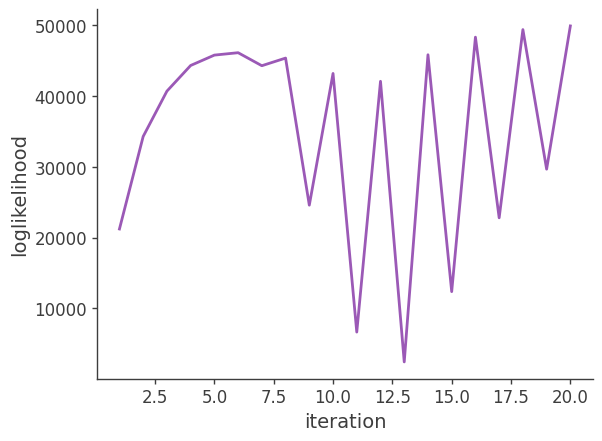

In [18]:
x, y = [], []

for _ in all_result:
    x.append(_['iteration'])
    y.append(_['loglikelihood'])
    
plt.plot(x, y)
plt.xlabel("iteration")
plt.ylabel("loglikelihood")

### alpha

Text(0, 0.5, 'alpha')

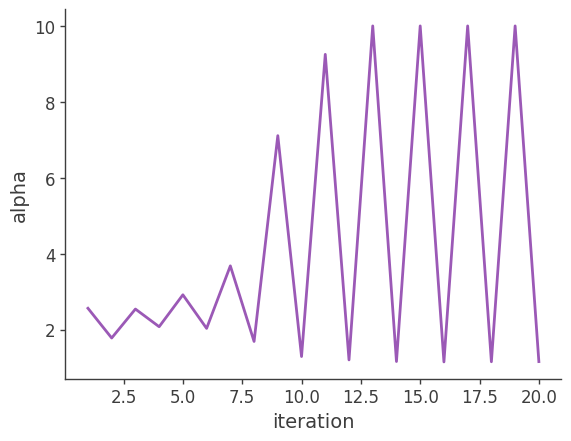

In [19]:
x, y = [], []

for _ in all_result:
    x.append(_['iteration'])
    y.append(_['alpha'])
    
plt.plot(x, y)
plt.xlabel("iteration")
plt.ylabel("alpha")

### image

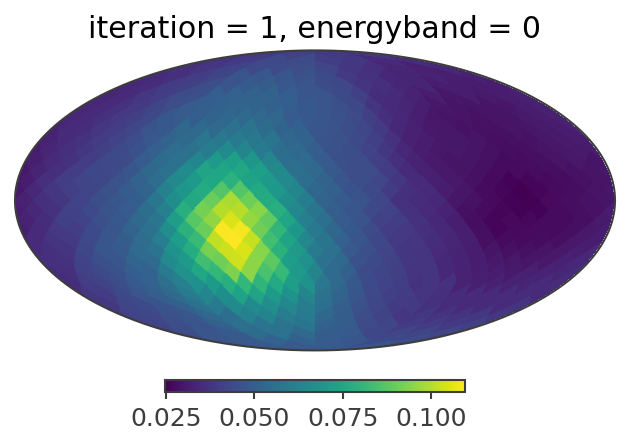

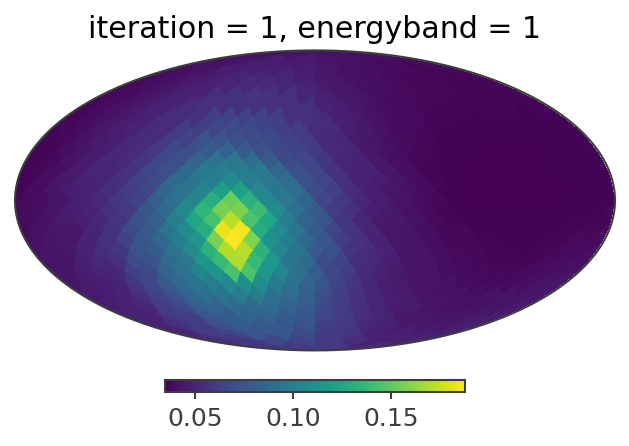

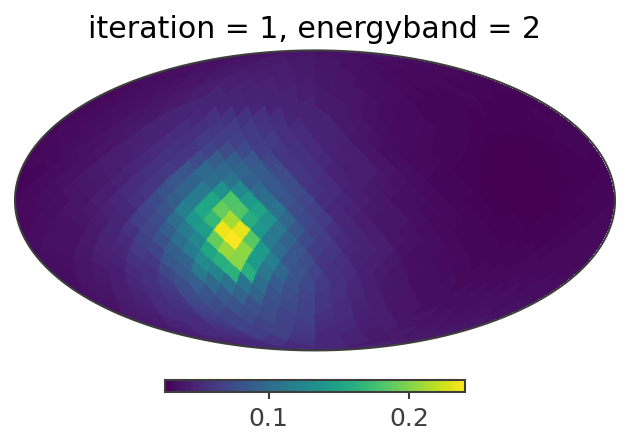

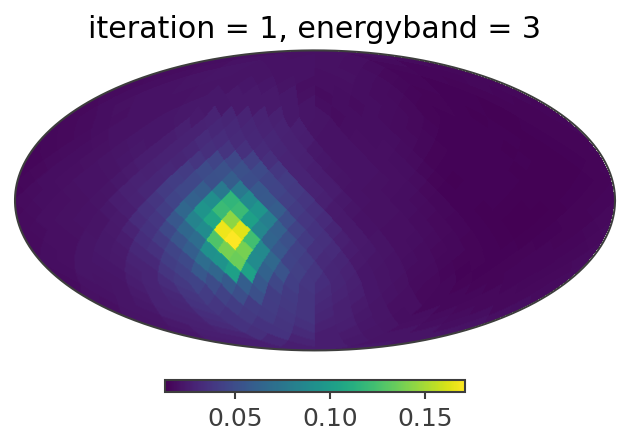

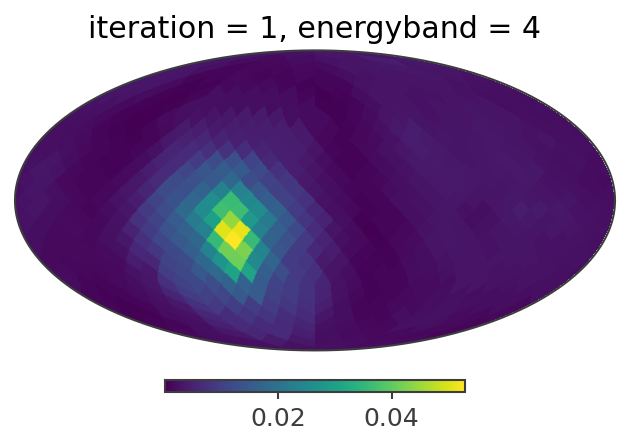

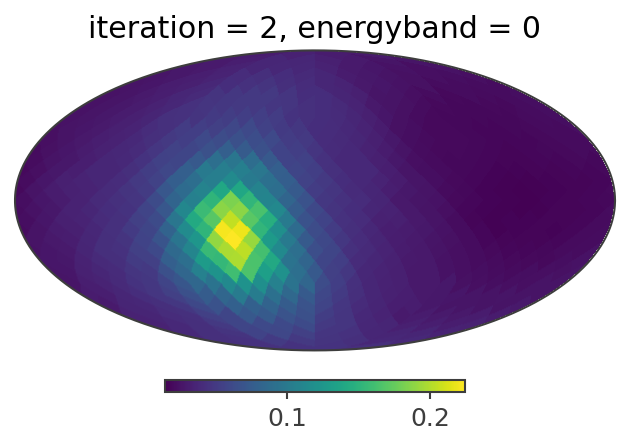

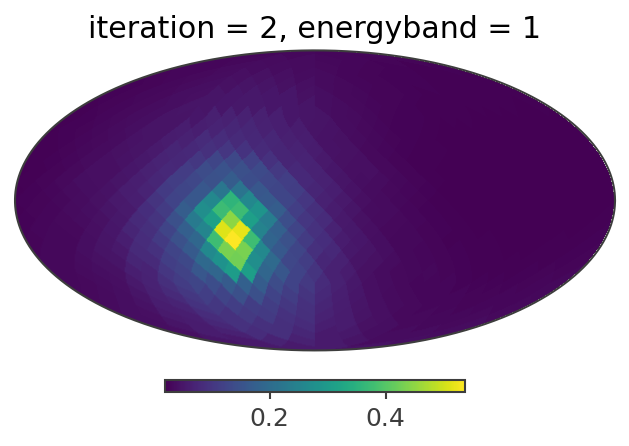

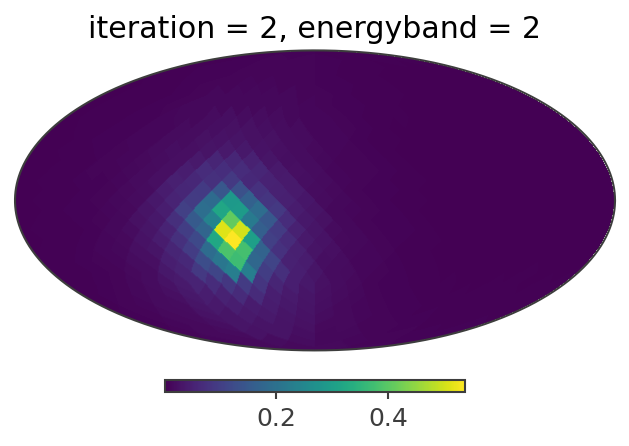

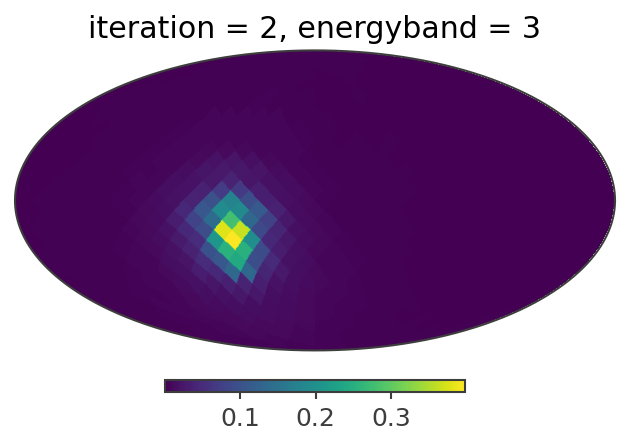

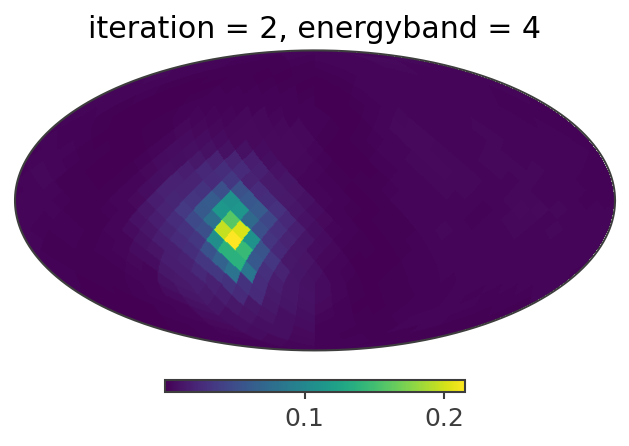

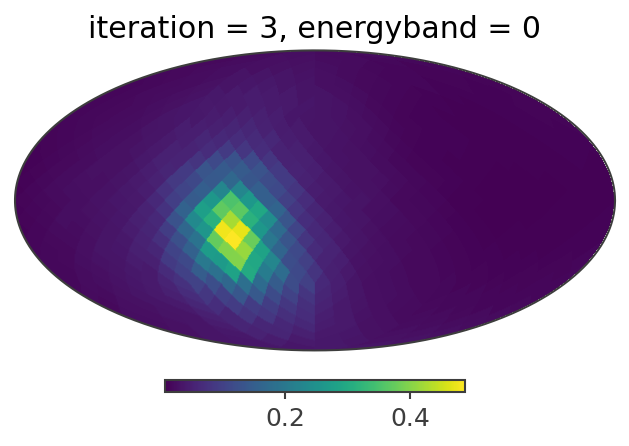

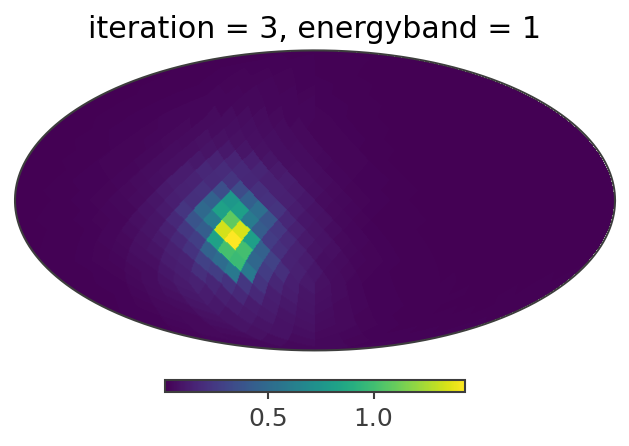

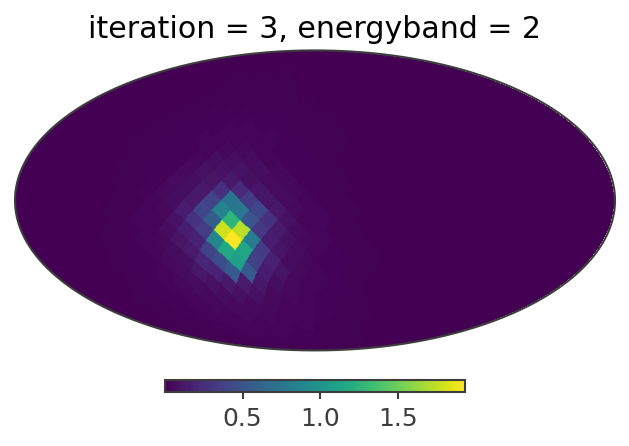

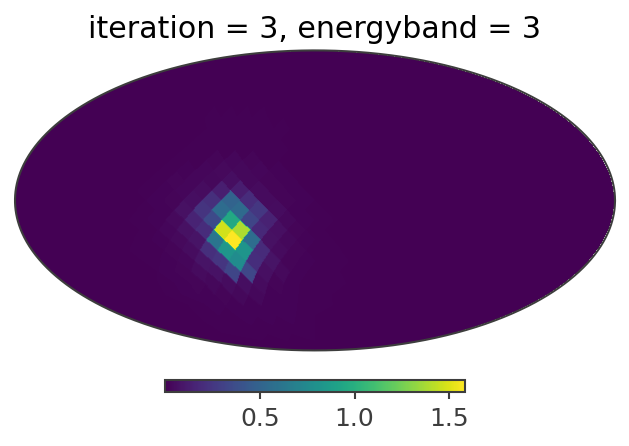

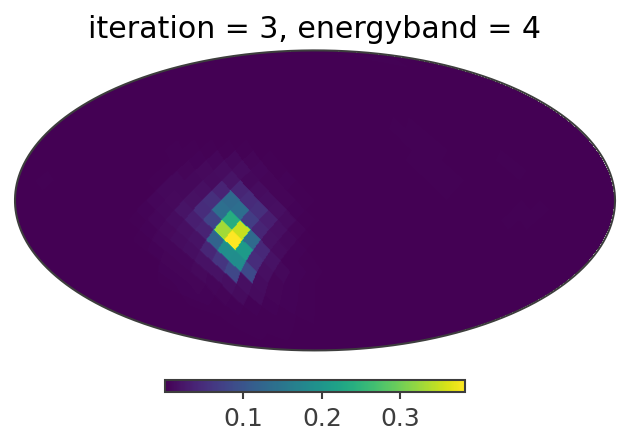

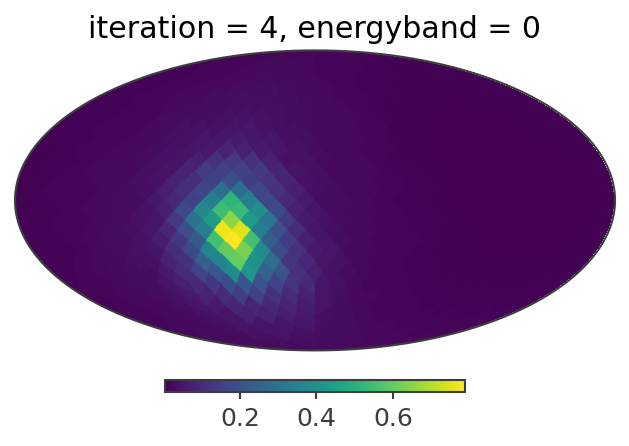

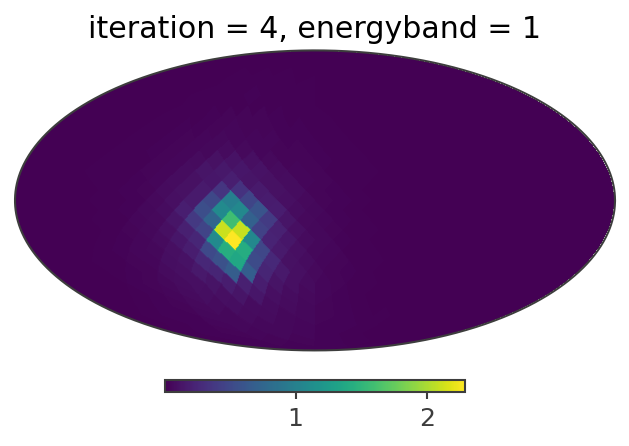

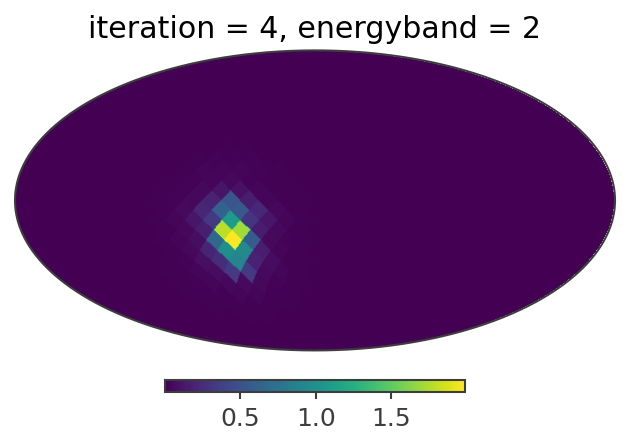

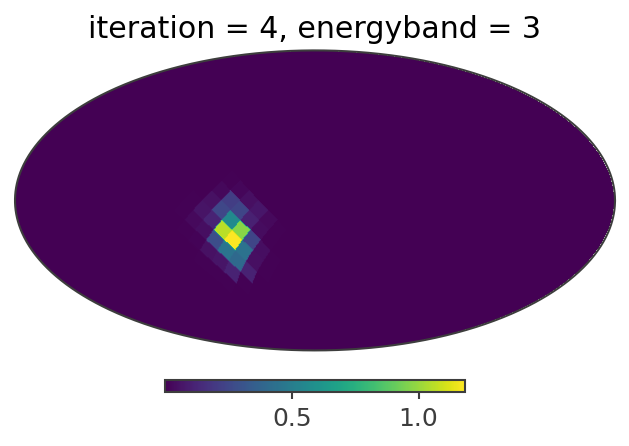

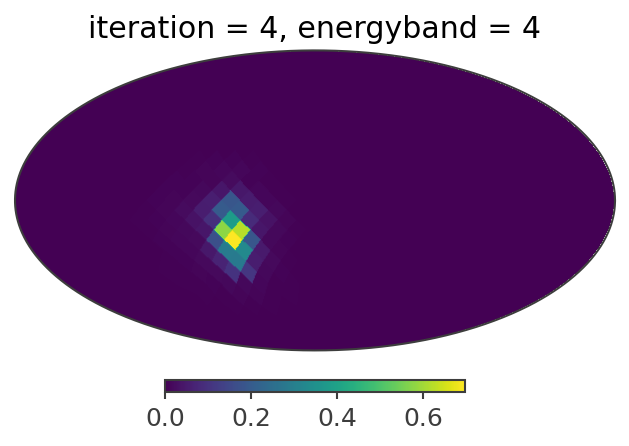

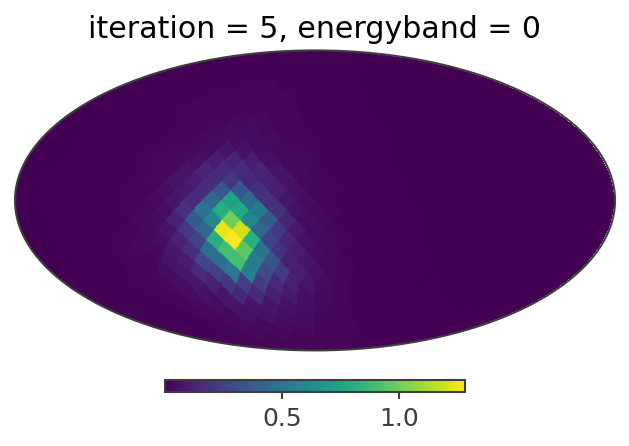

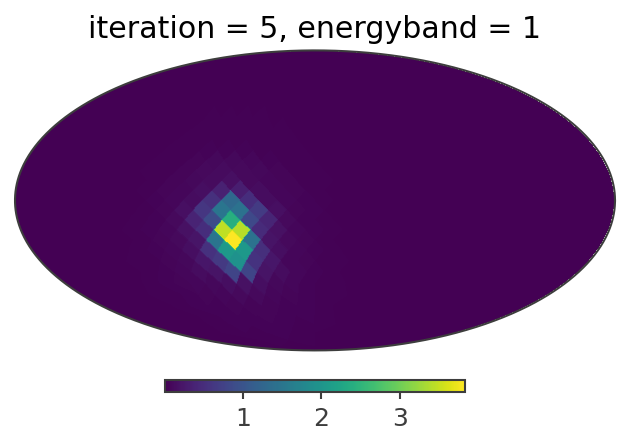

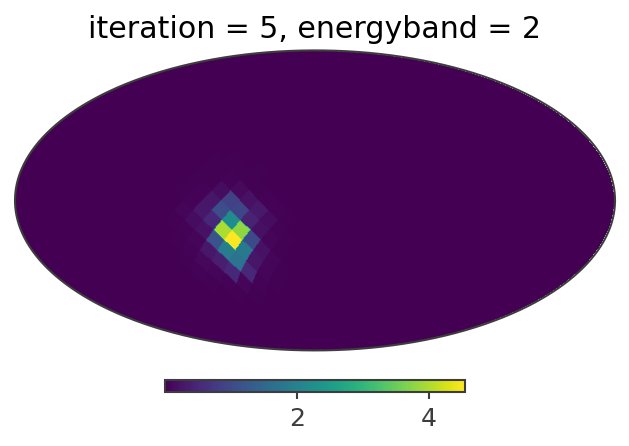

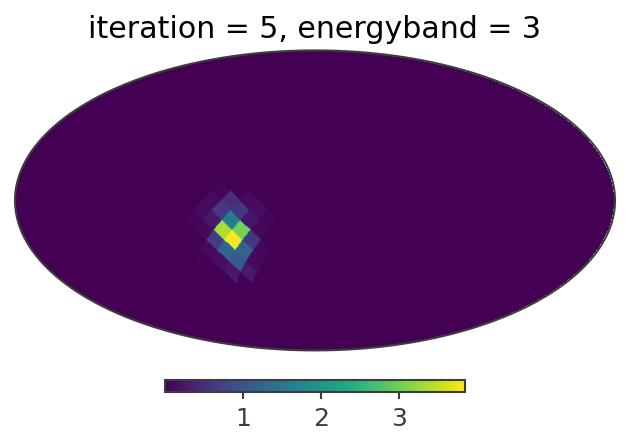

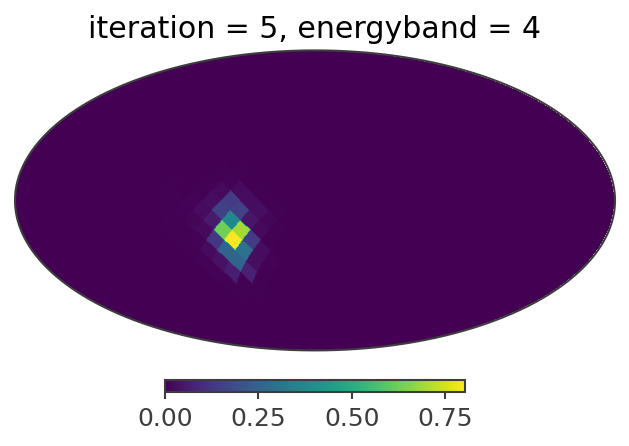

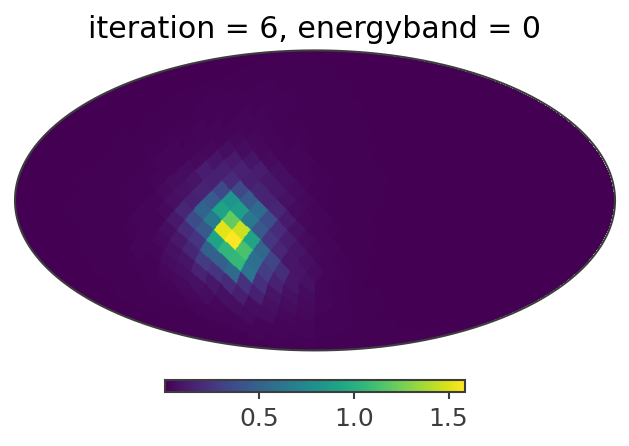

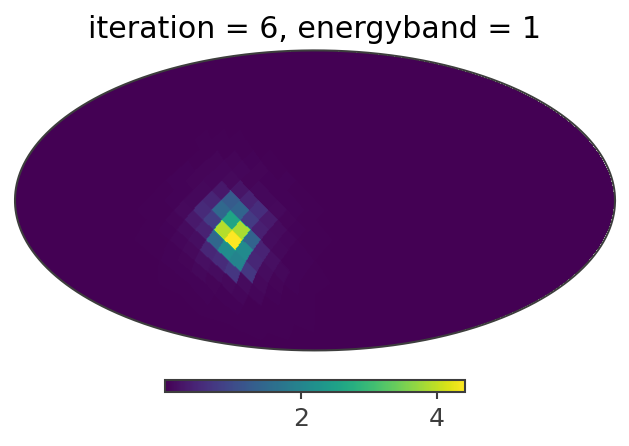

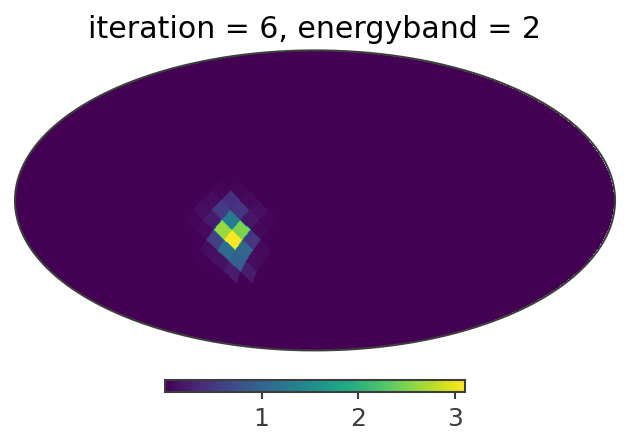

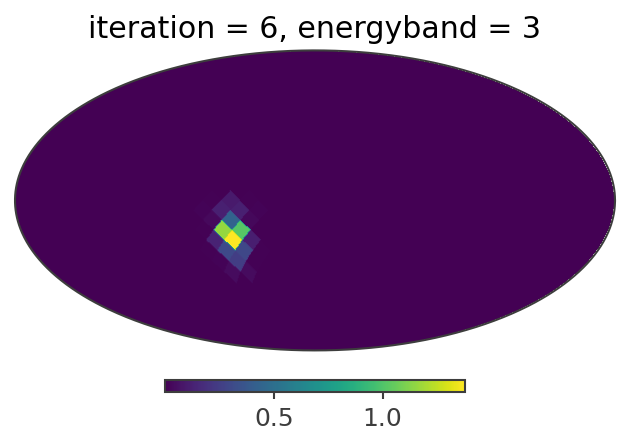

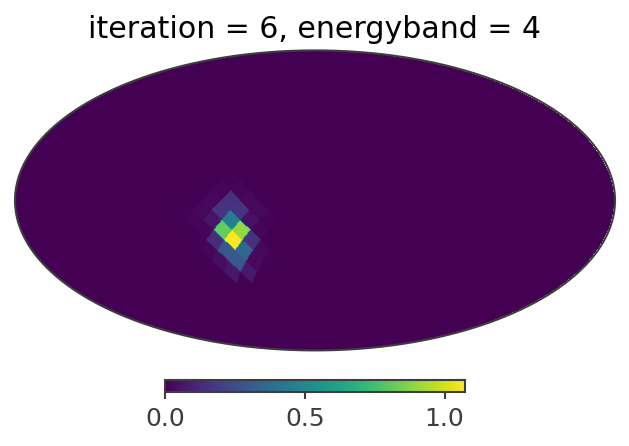

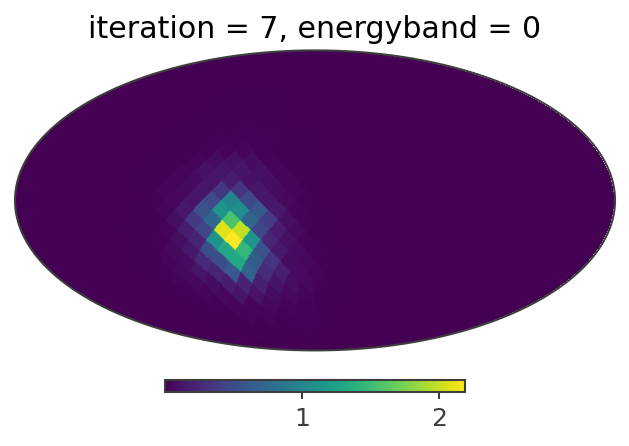

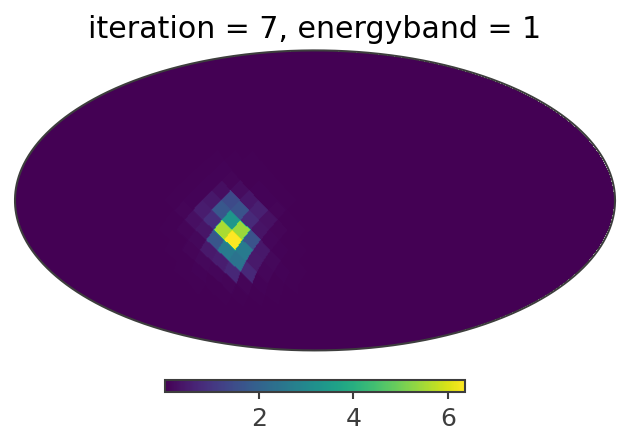

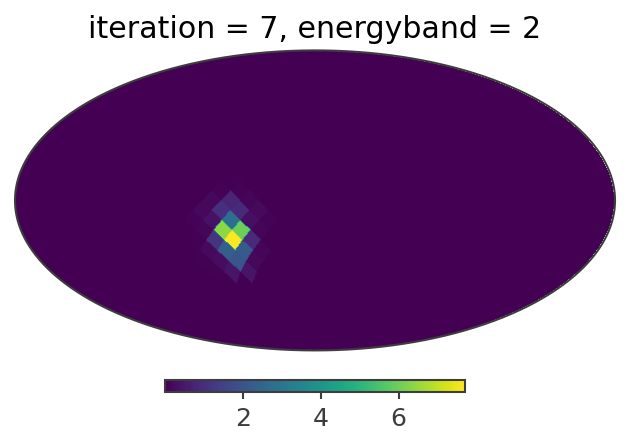

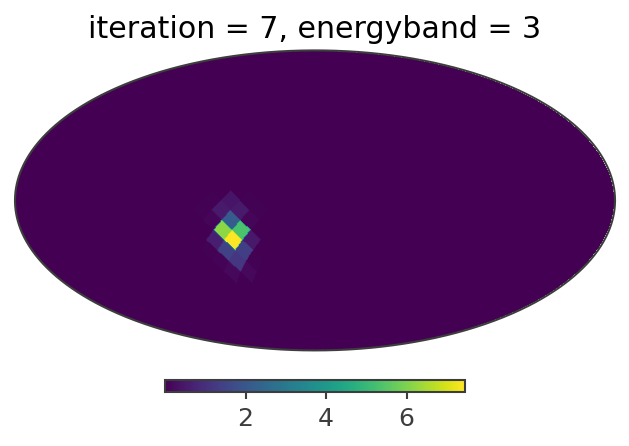

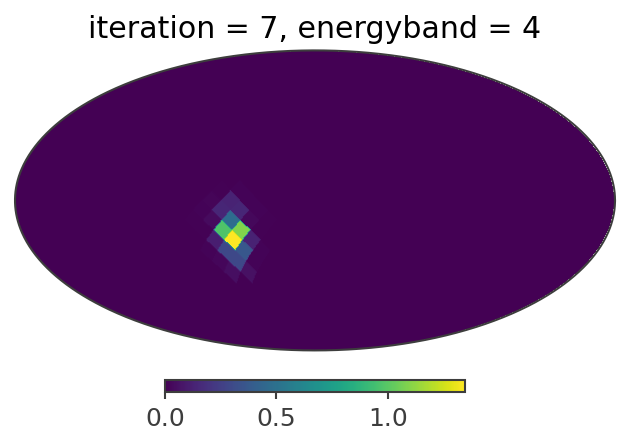

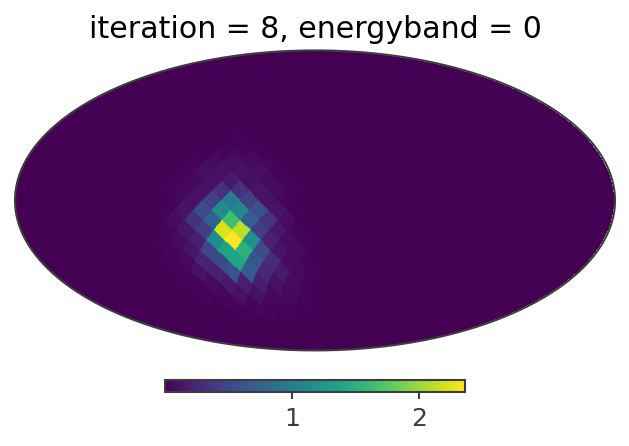

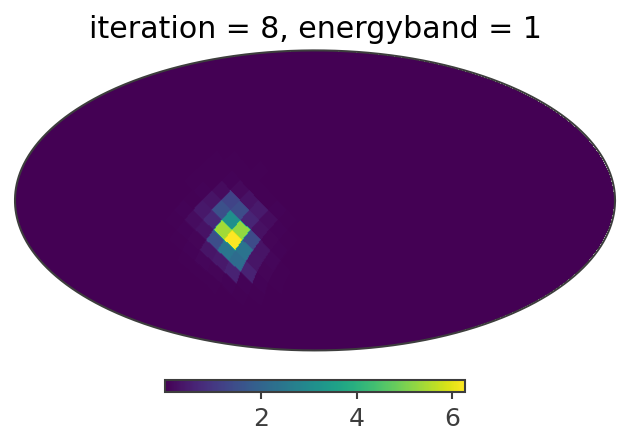

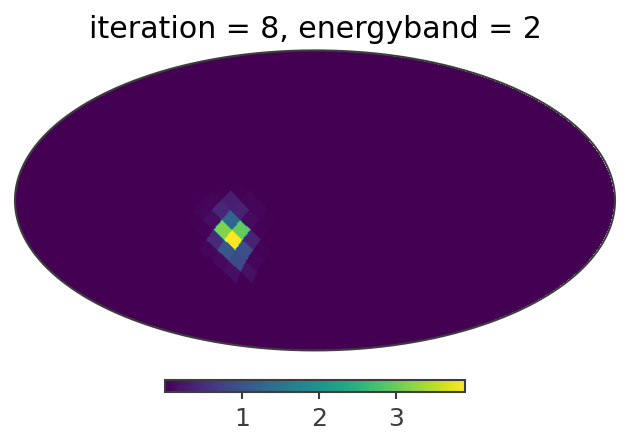

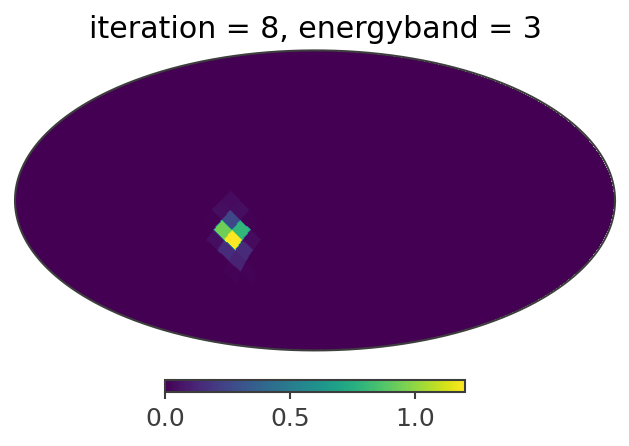

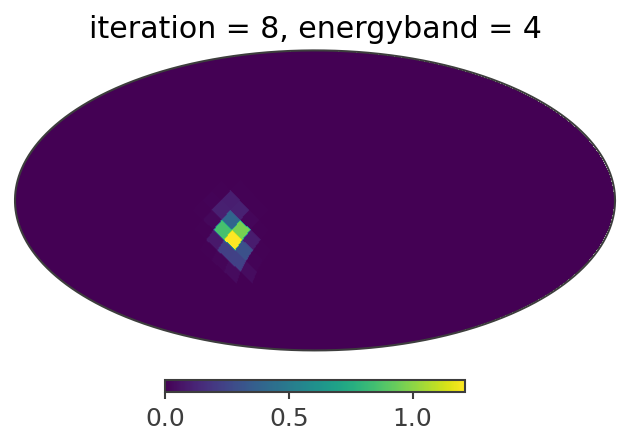

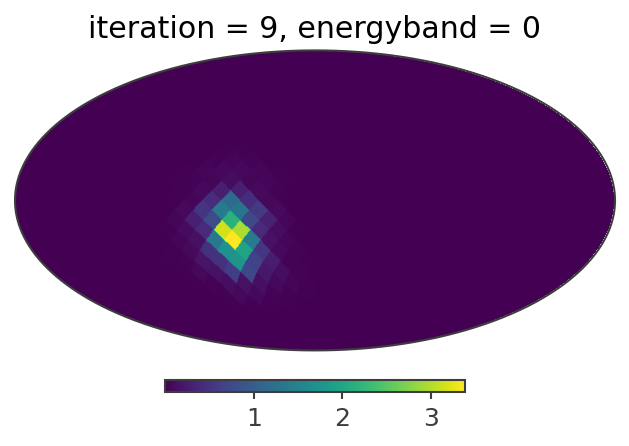

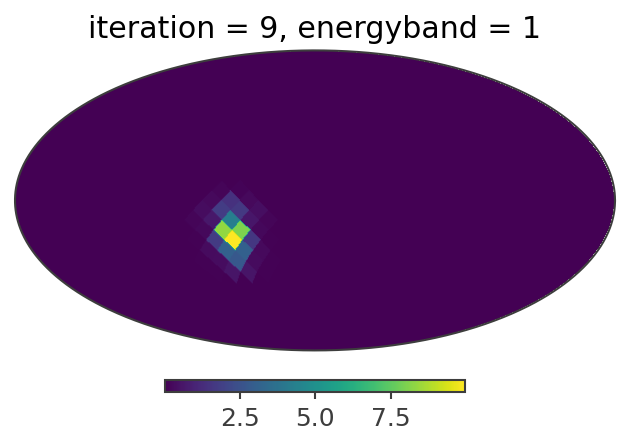

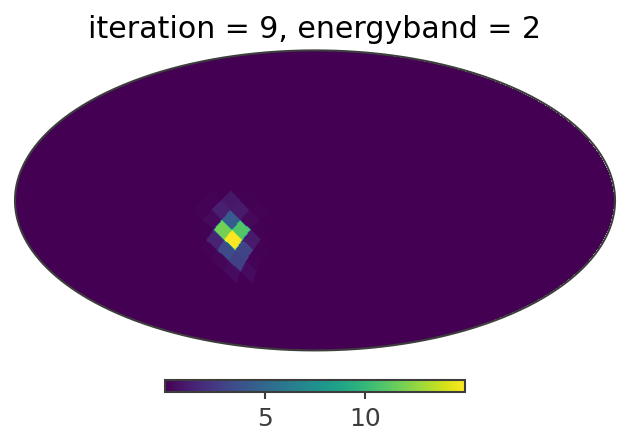

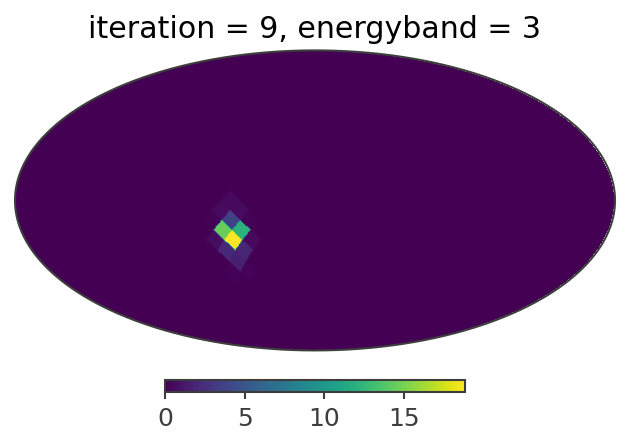

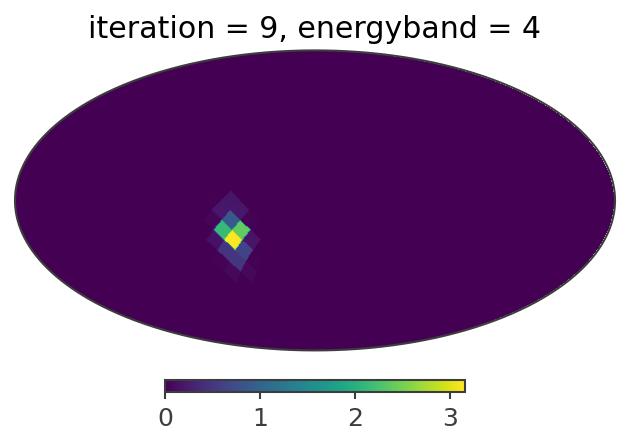

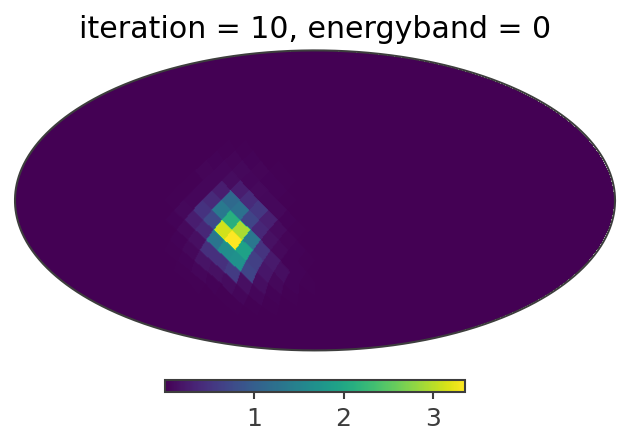

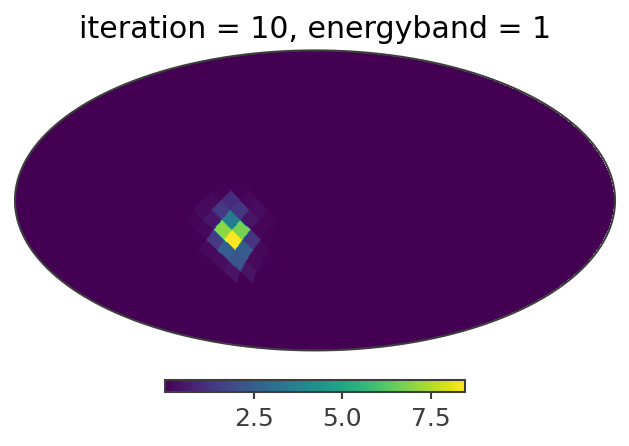

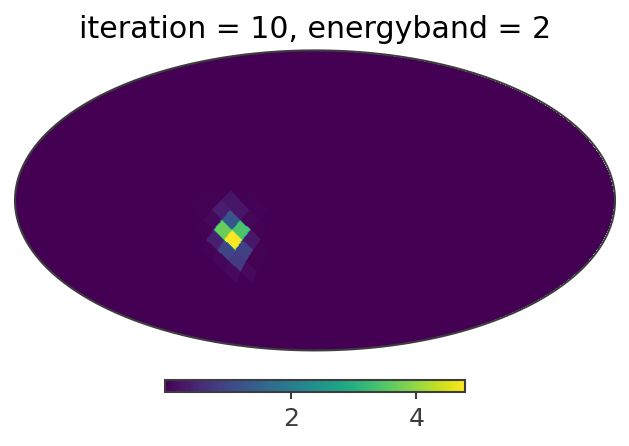

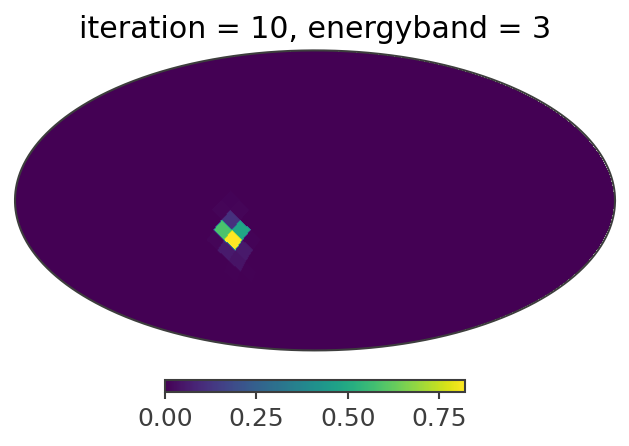

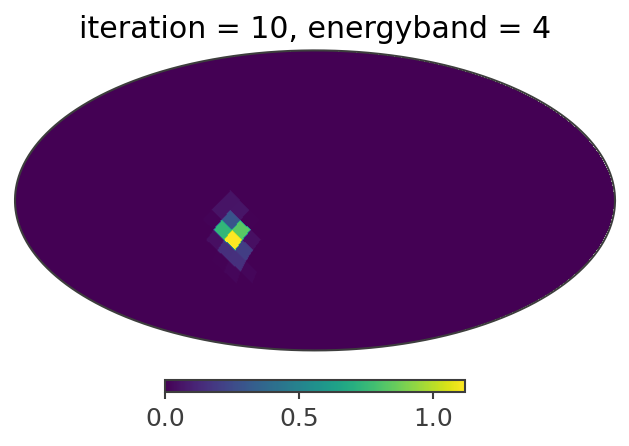

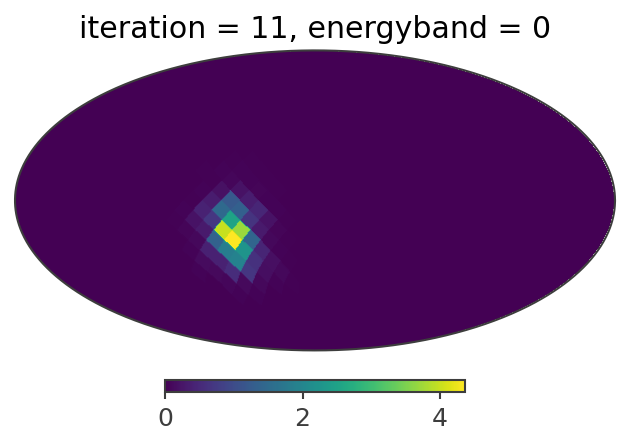

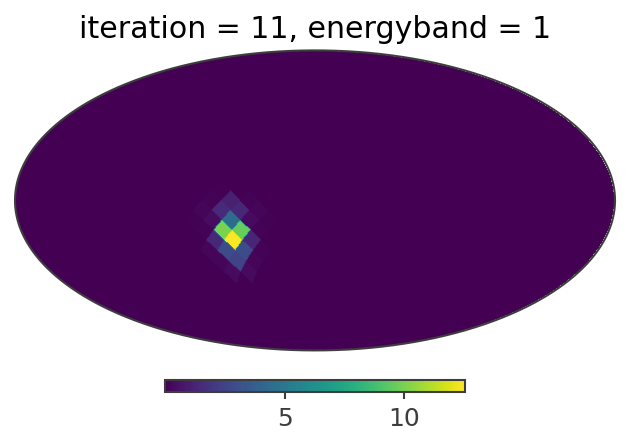

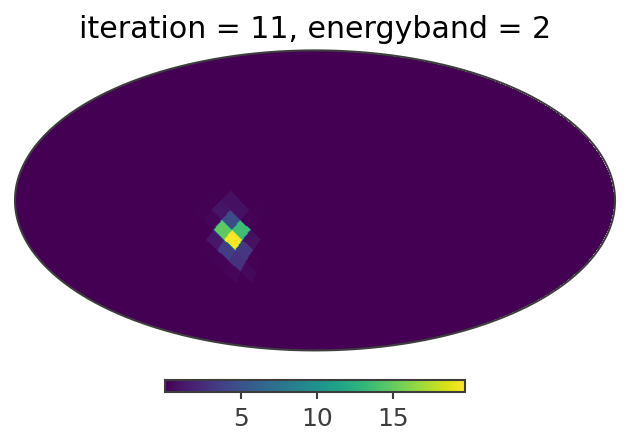

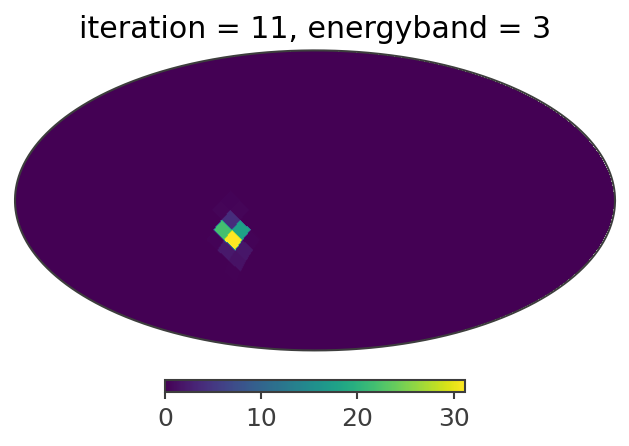

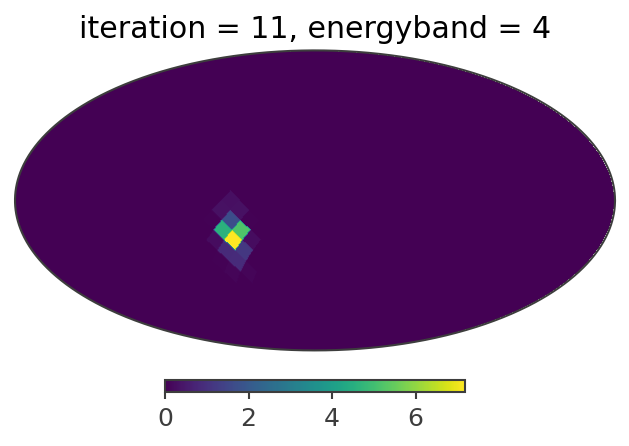

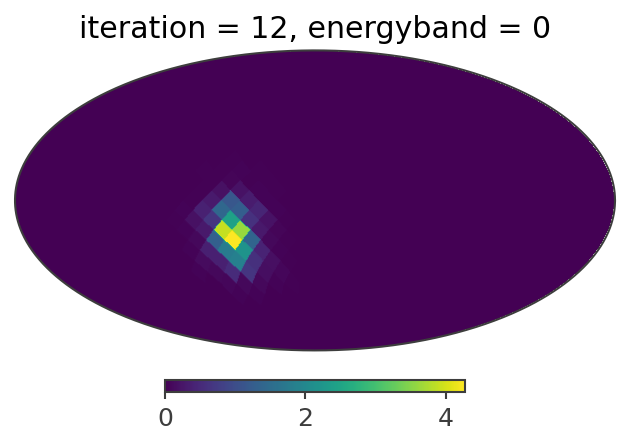

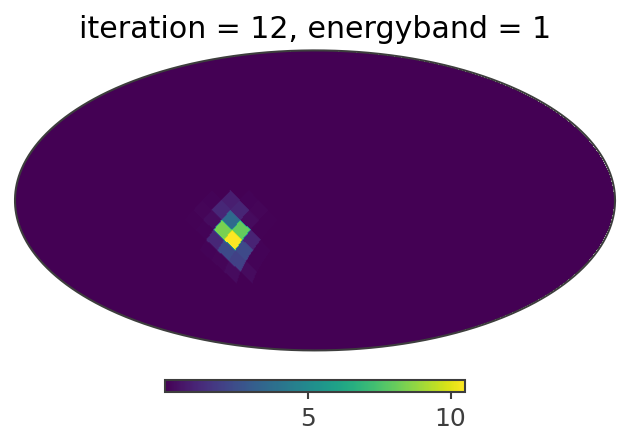

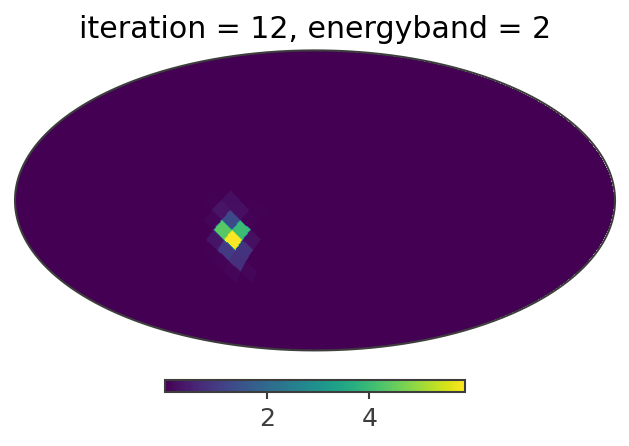

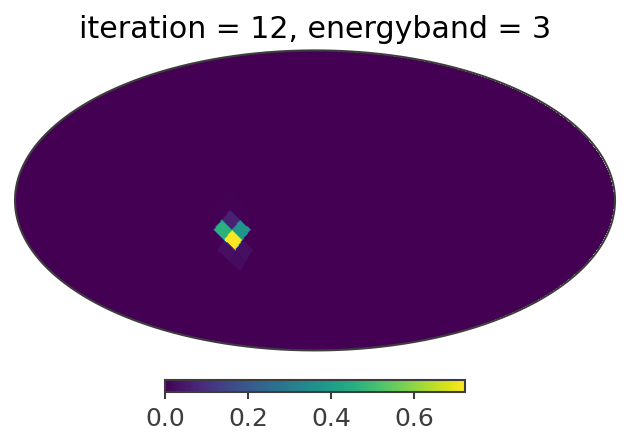

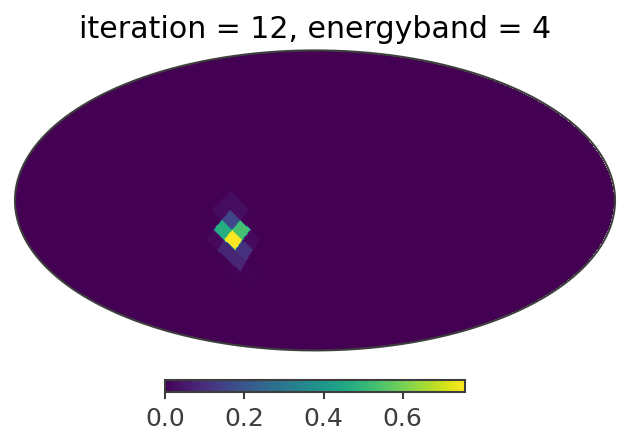

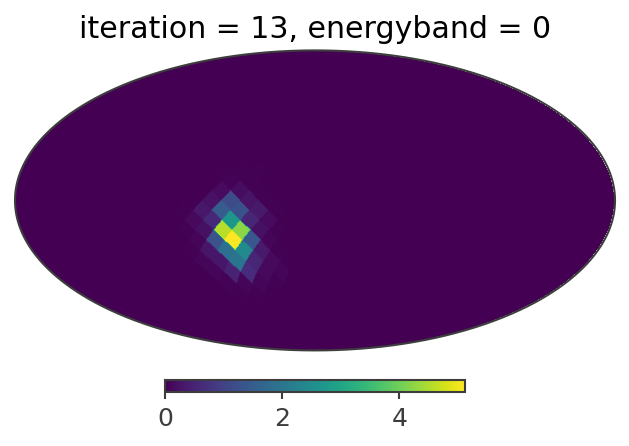

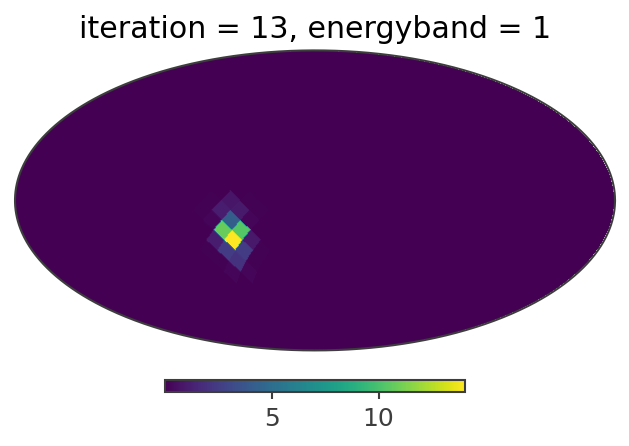

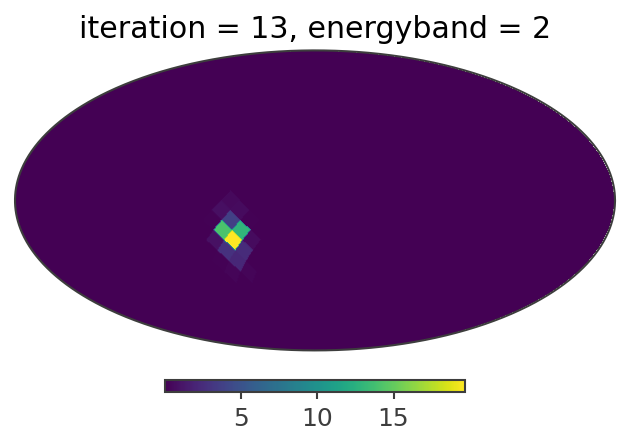

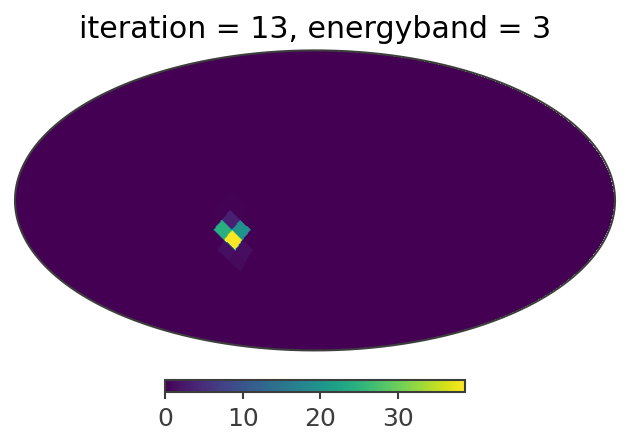

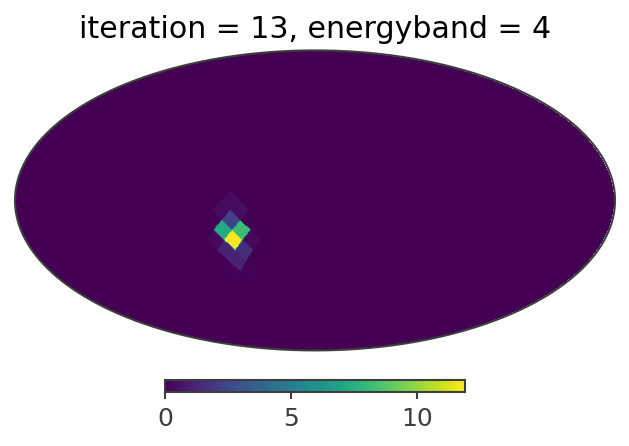

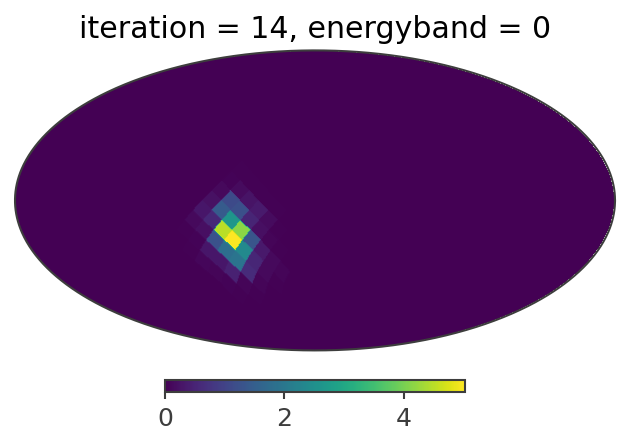

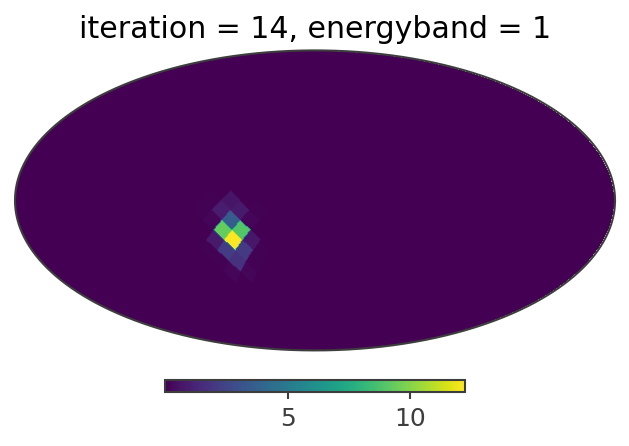

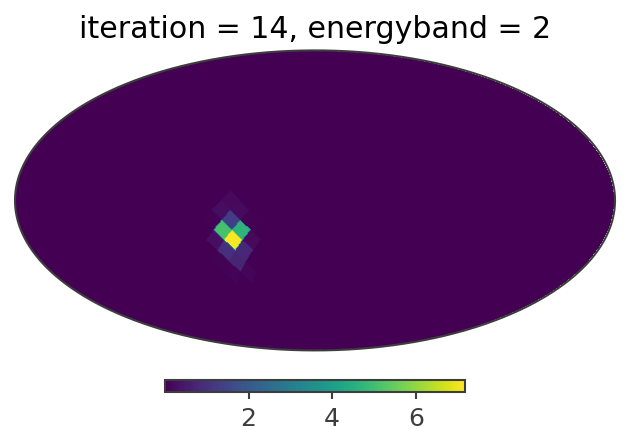

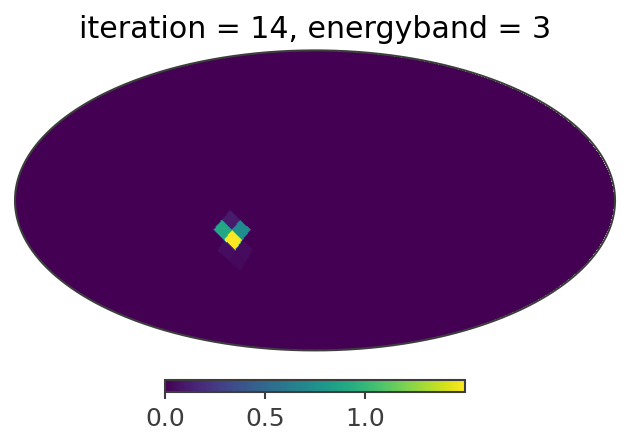

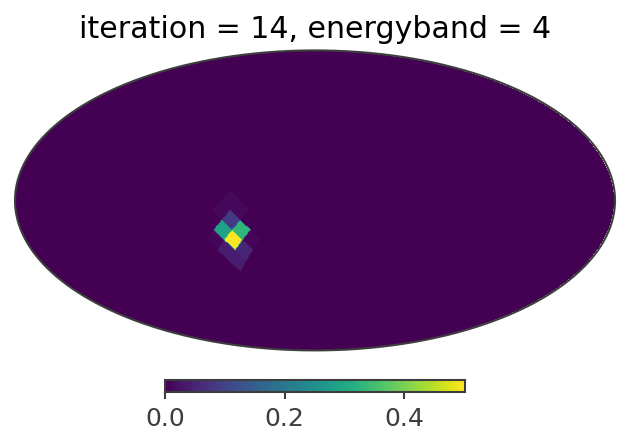

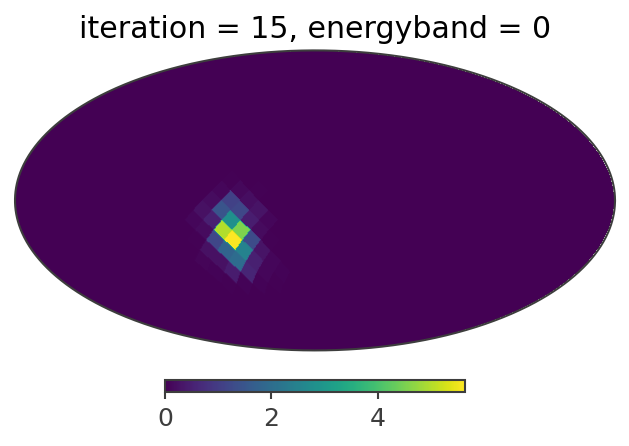

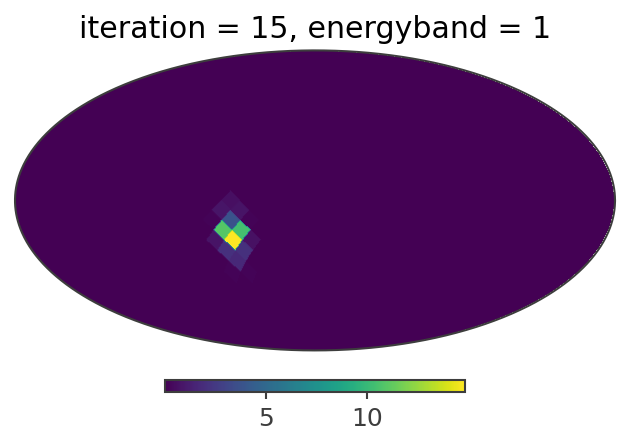

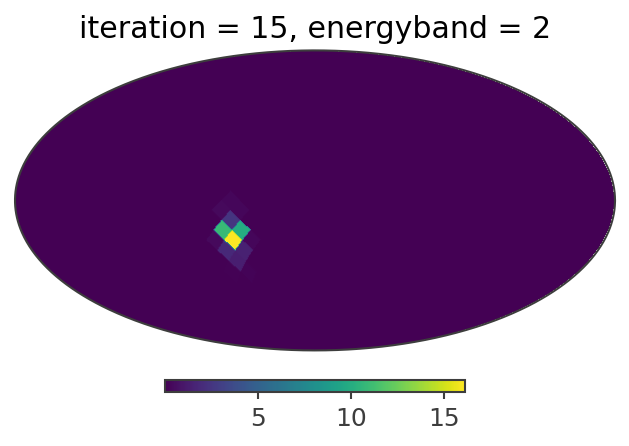

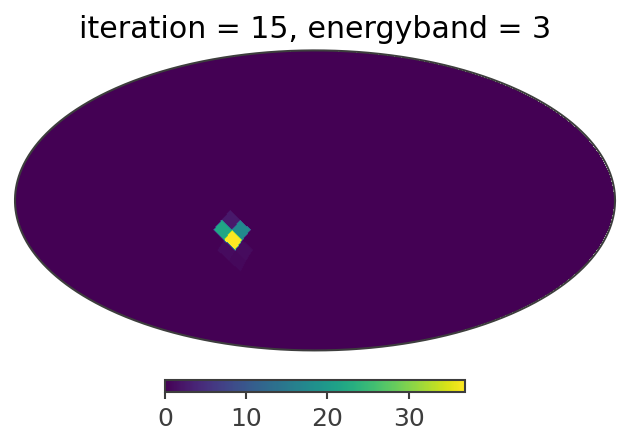

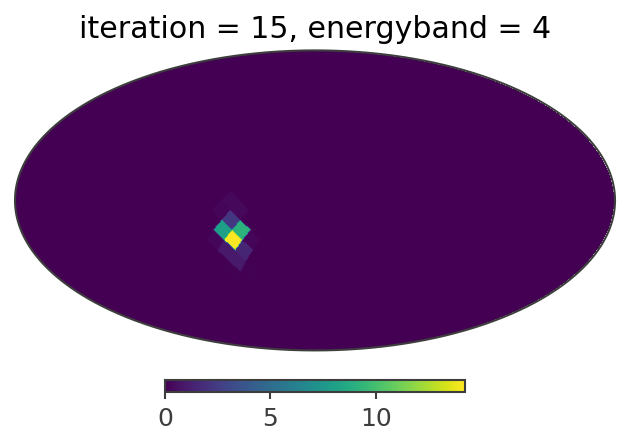

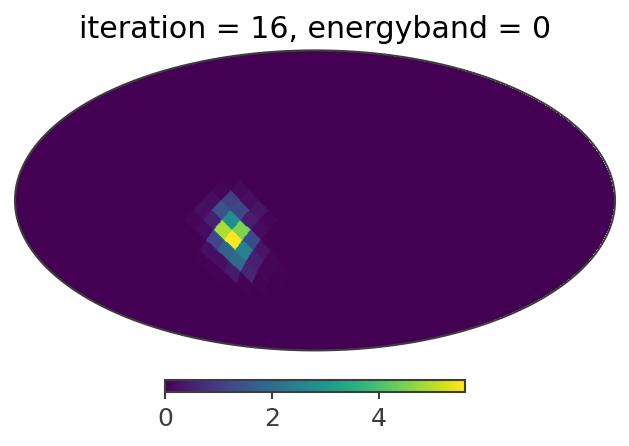

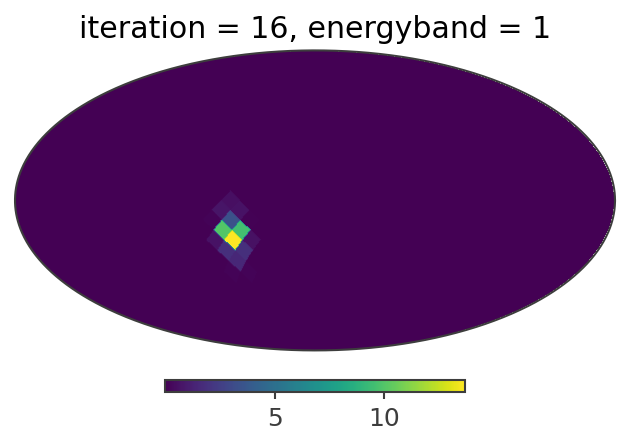

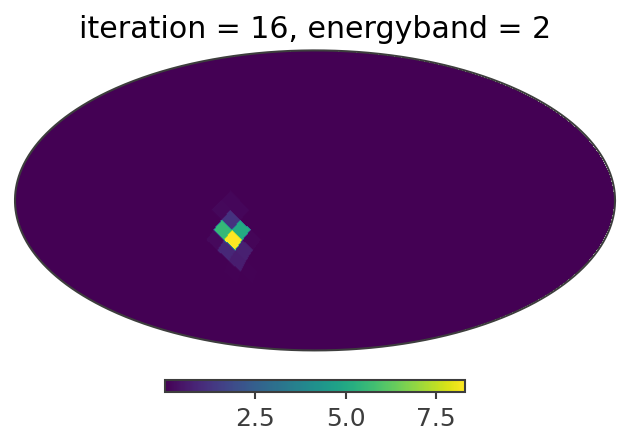

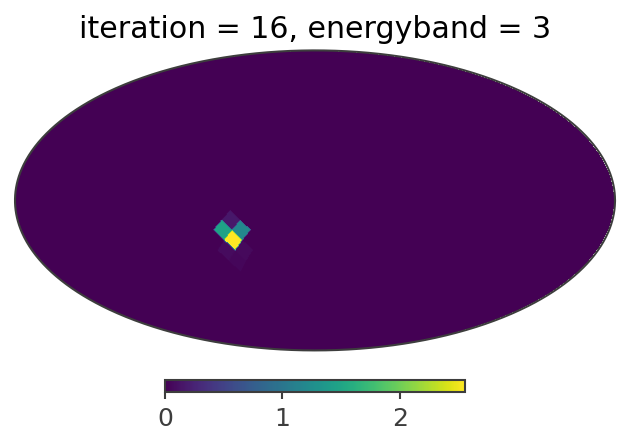

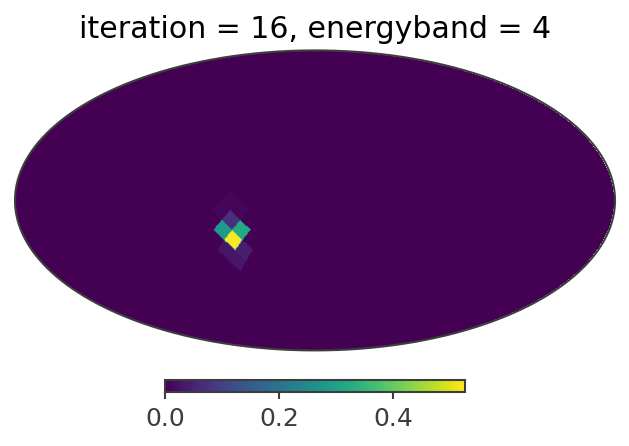

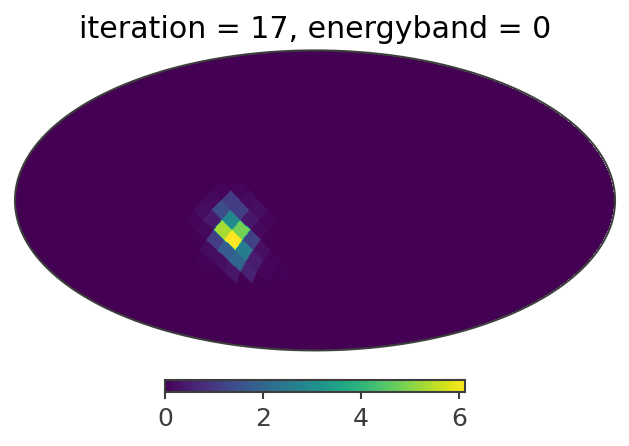

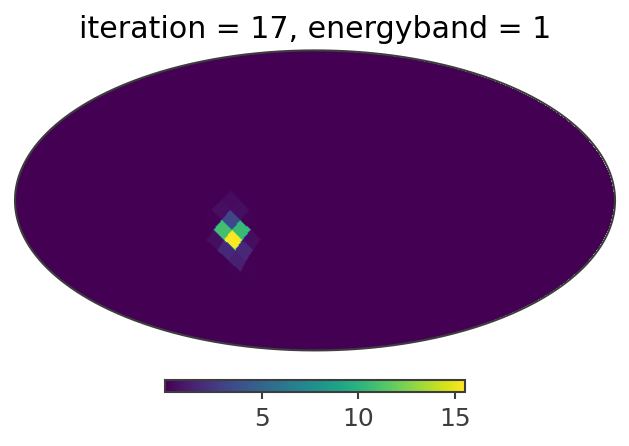

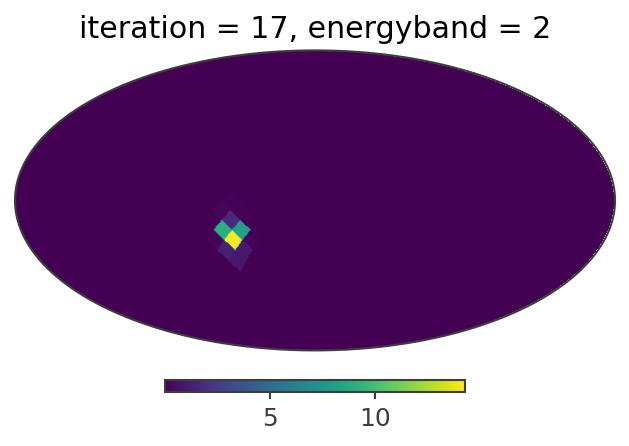

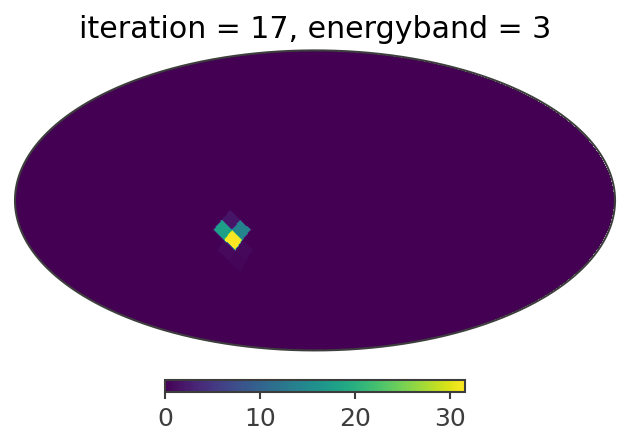

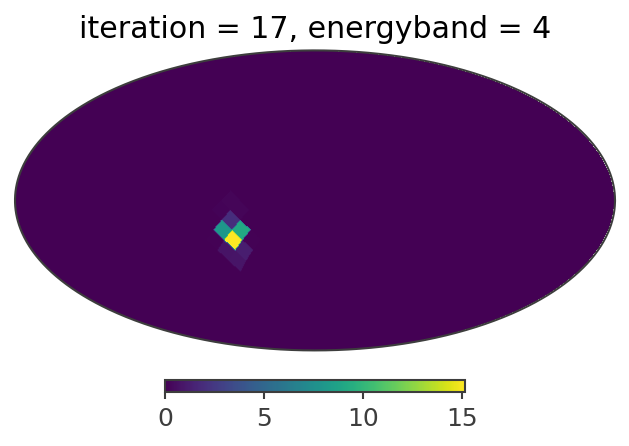

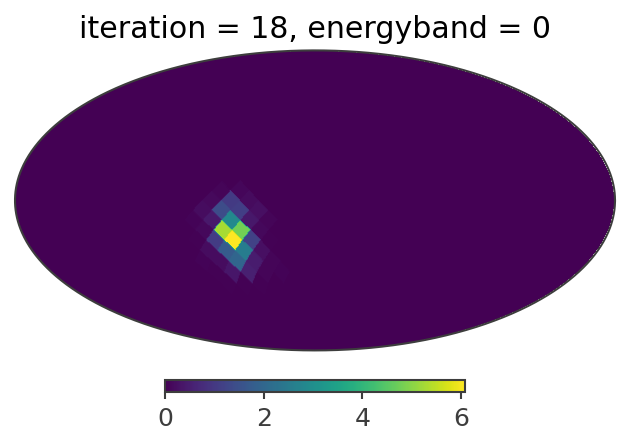

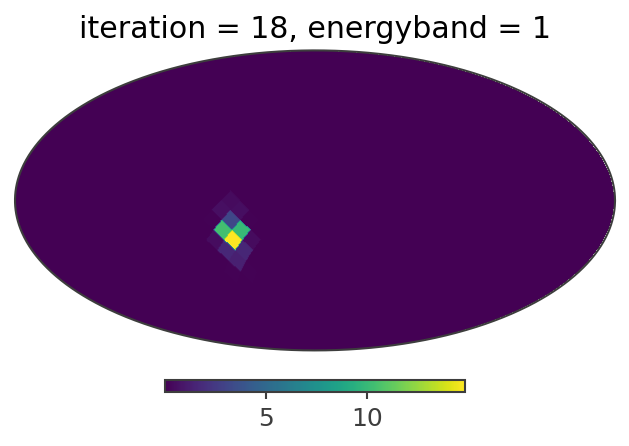

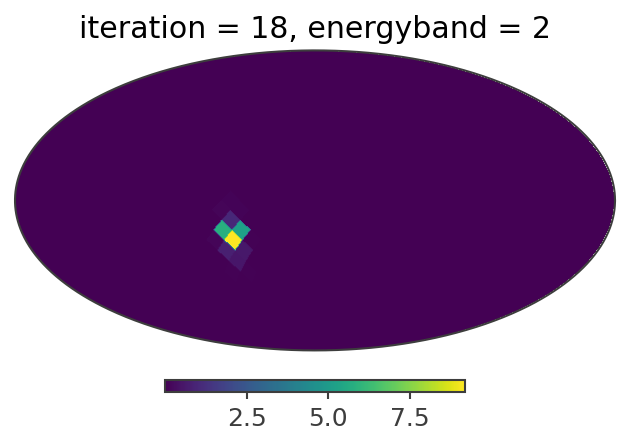

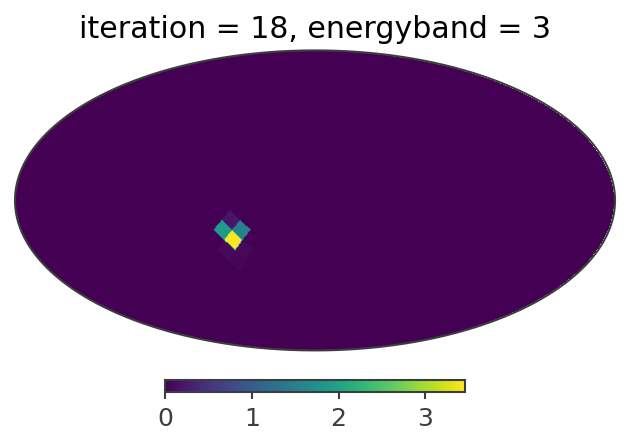

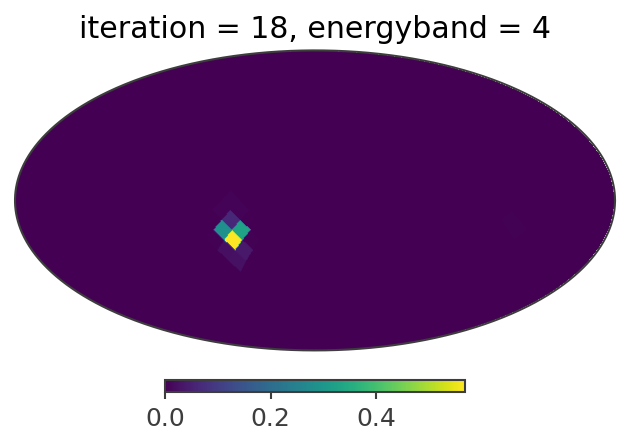

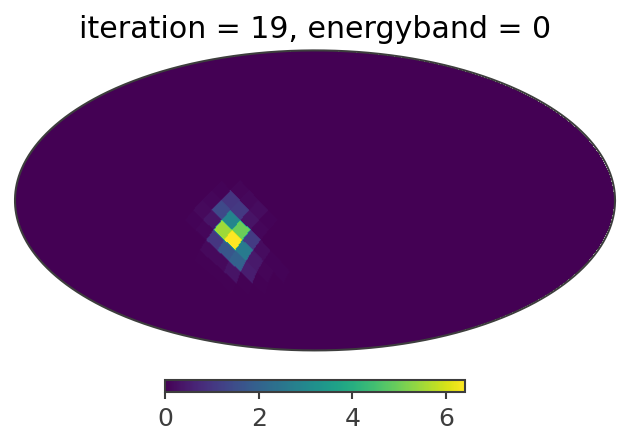

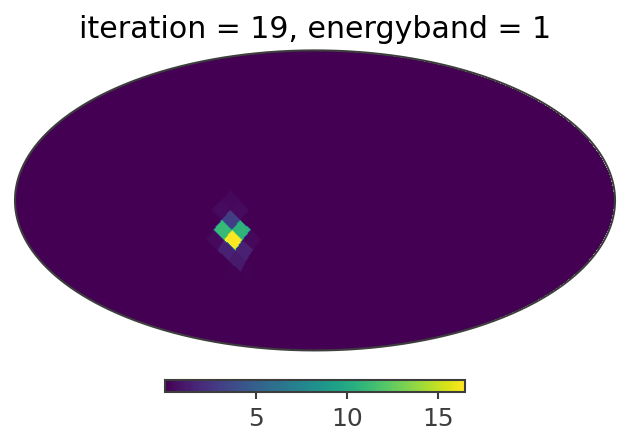

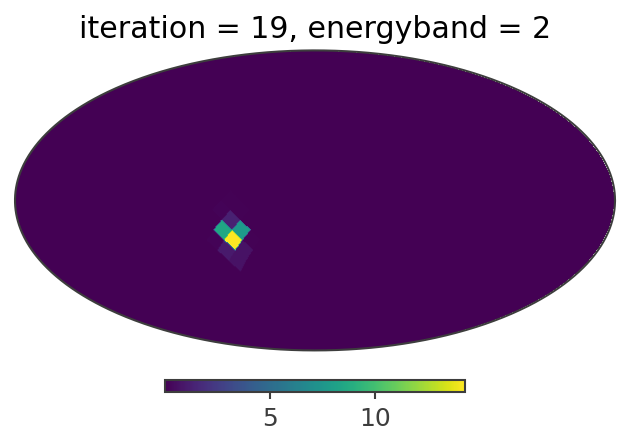

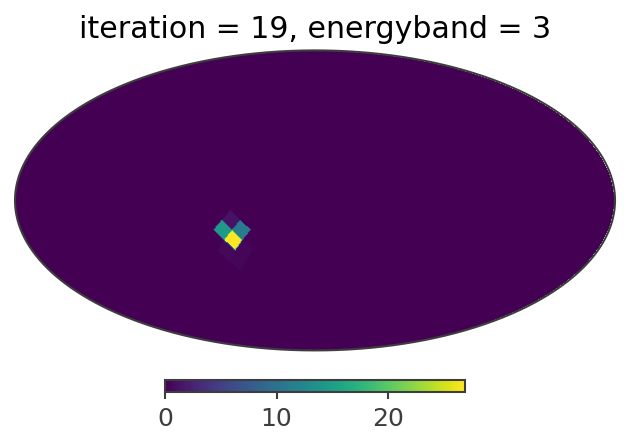

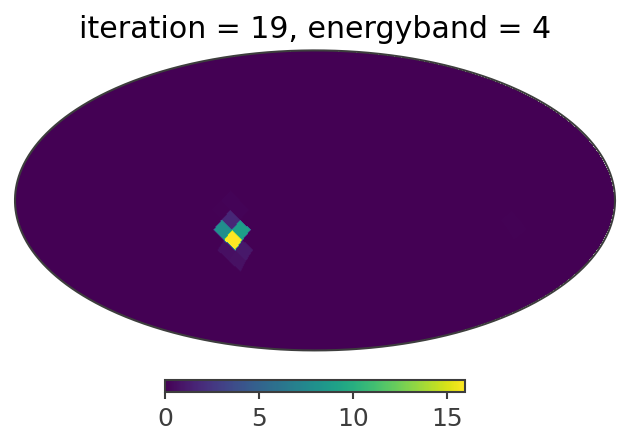

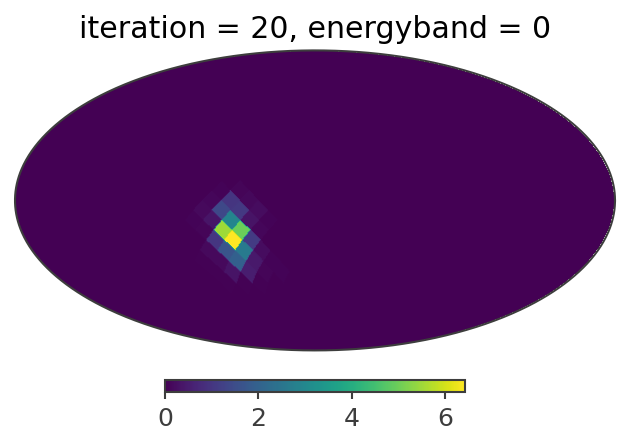

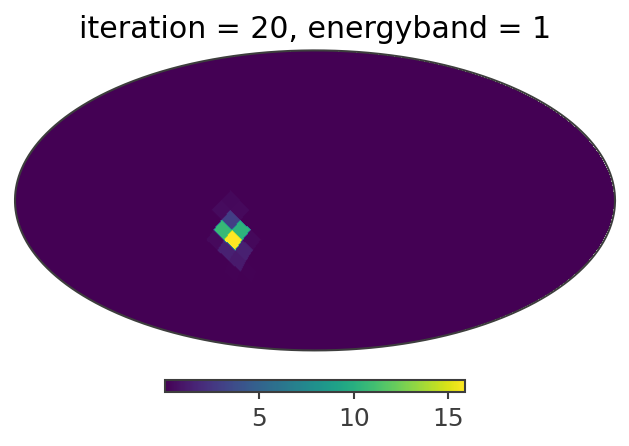

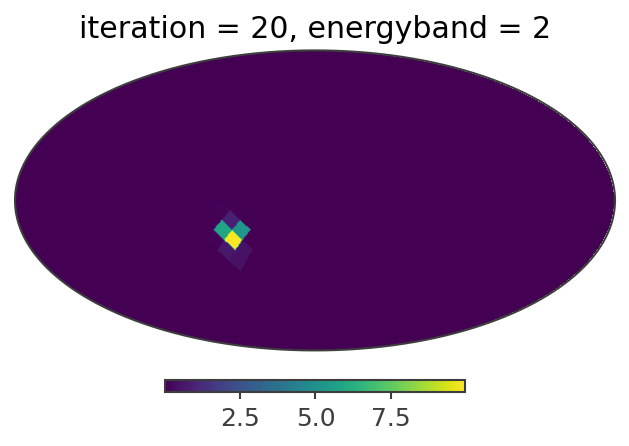

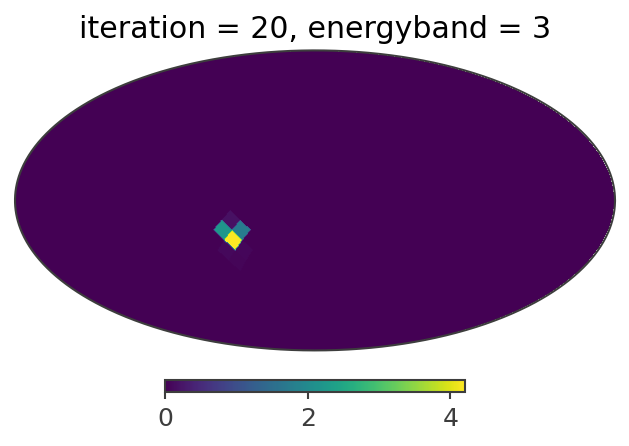

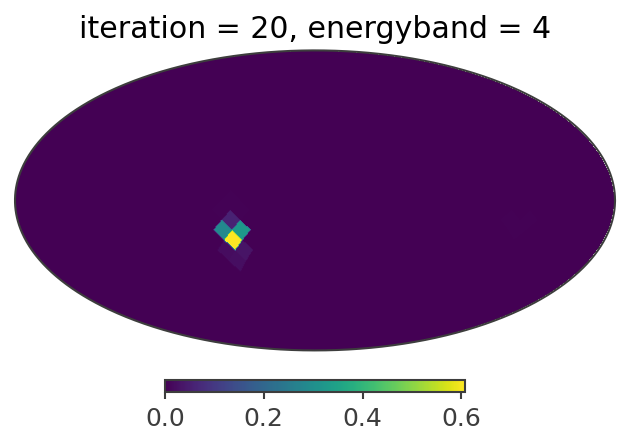

In [20]:
for _ in all_result:
    iteration = _['iteration']
    image = _['model_map']
        
    for energy_band in range(5):
        map_healpxmap = HealpixMap(data = image[:,energy_band], unit = image.unit)

        map_healpxmap.plot()
        plt.title(label = "iteration = {}, energyband = {}".format(iteration, energy_band))
        plt.show()

### delta_image

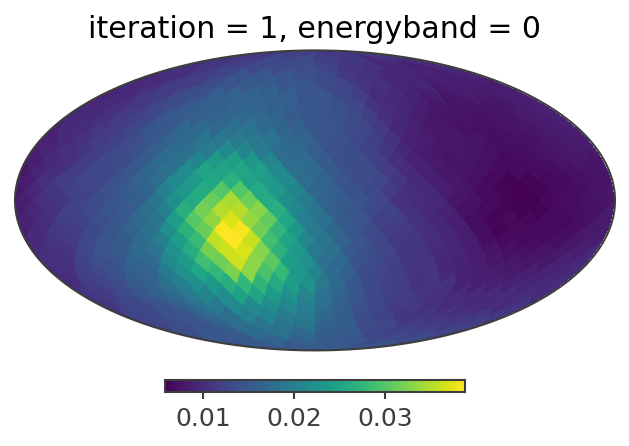

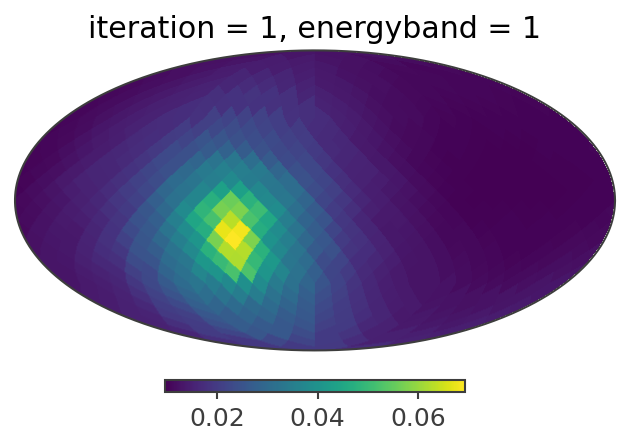

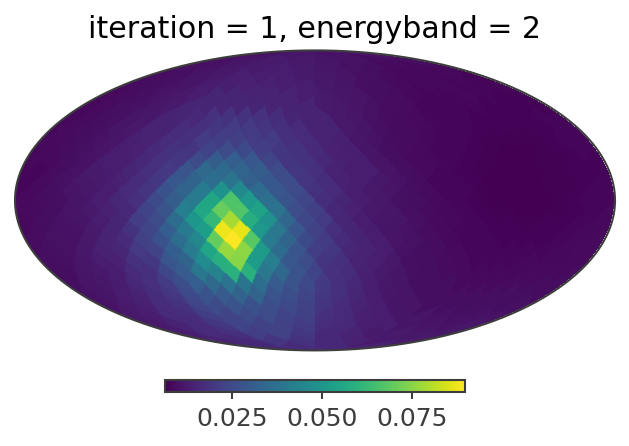

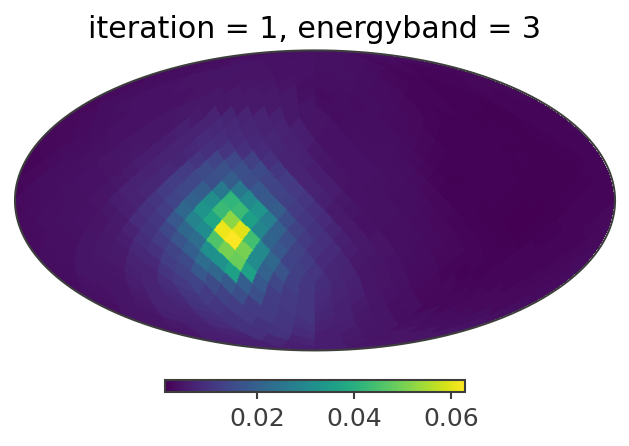

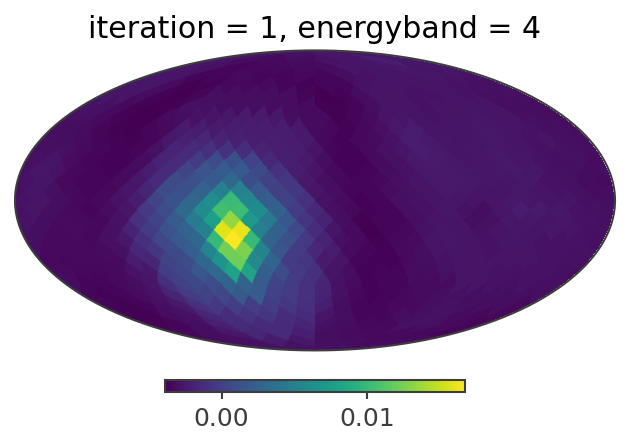

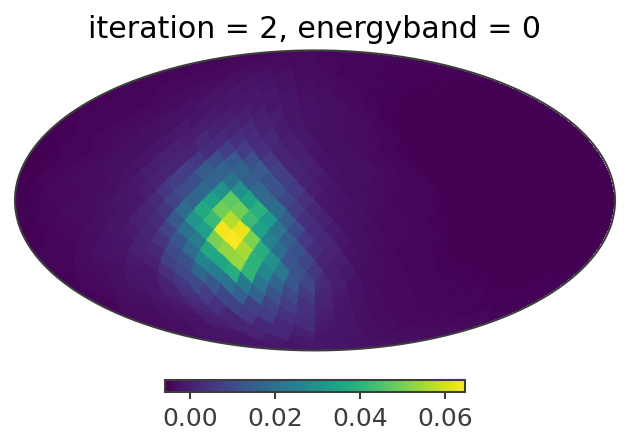

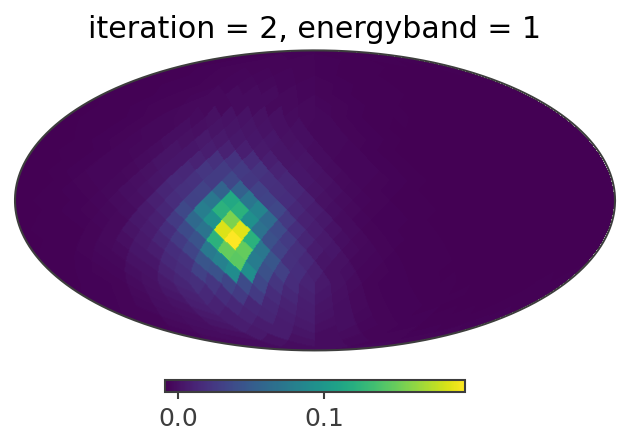

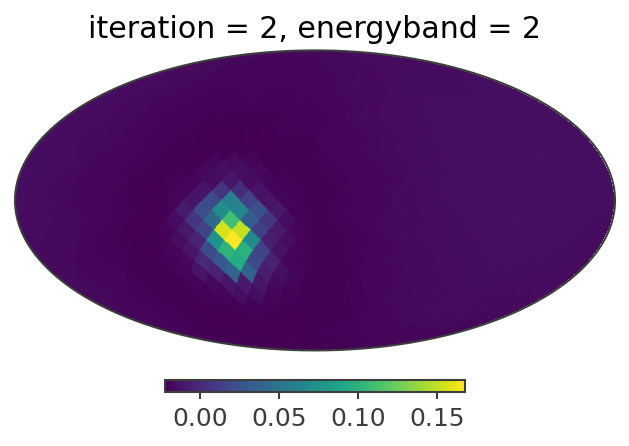

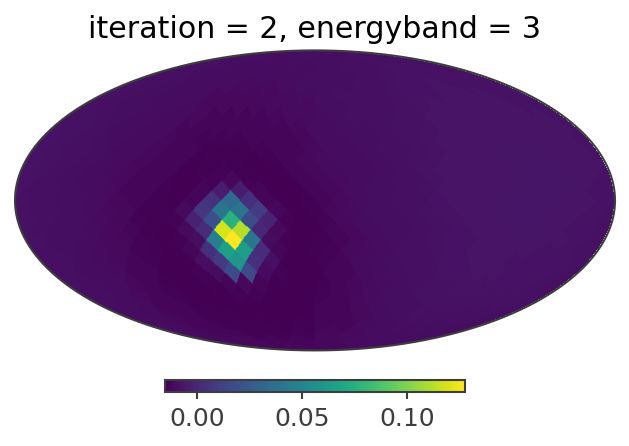

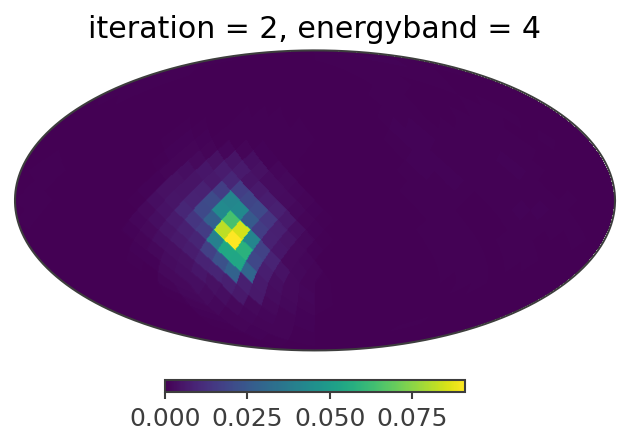

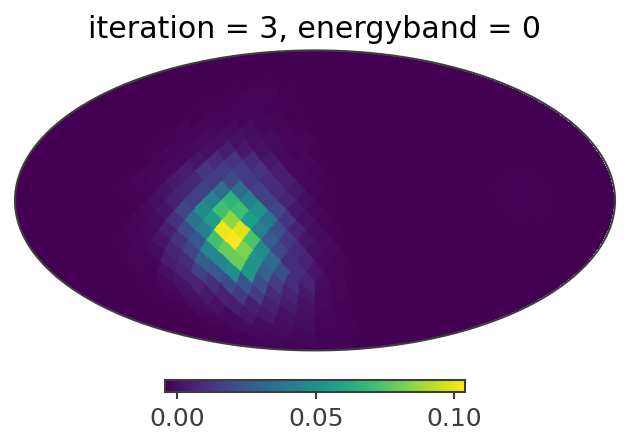

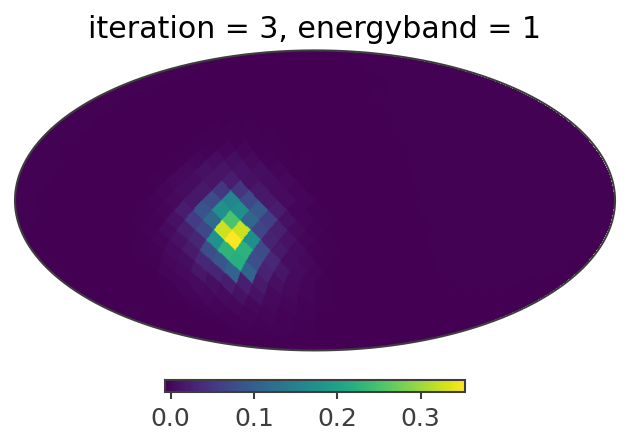

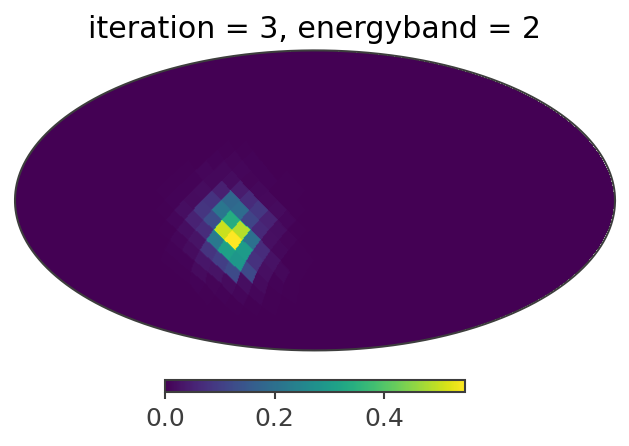

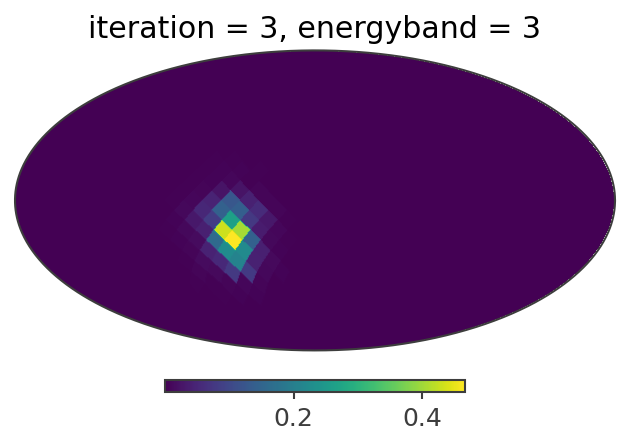

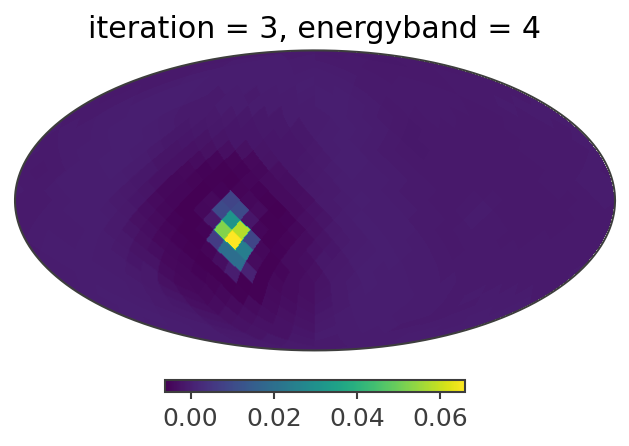

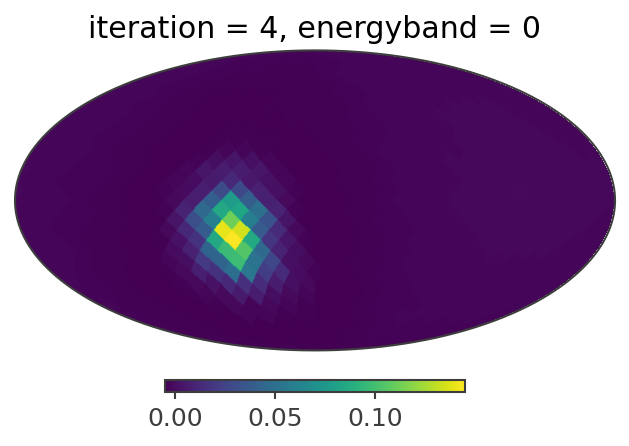

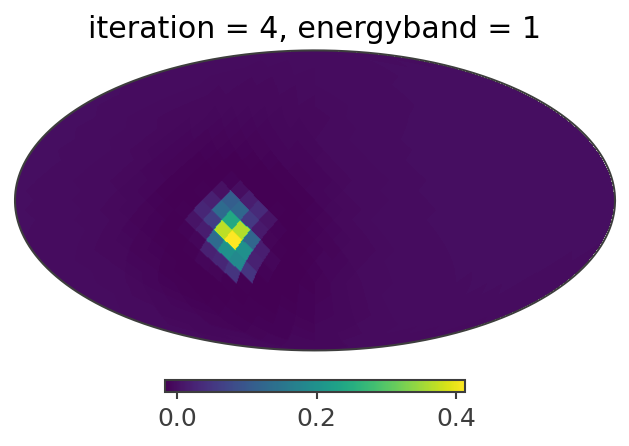

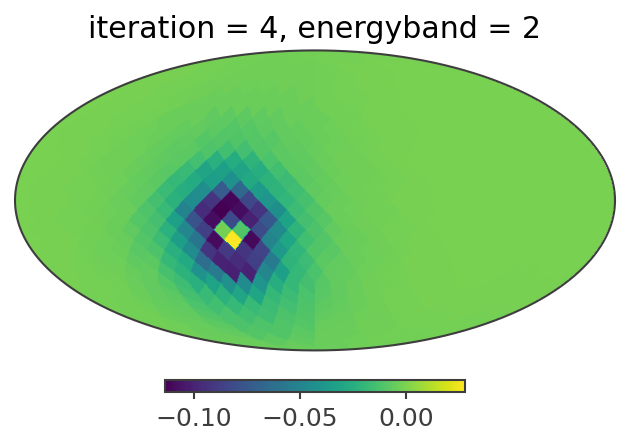

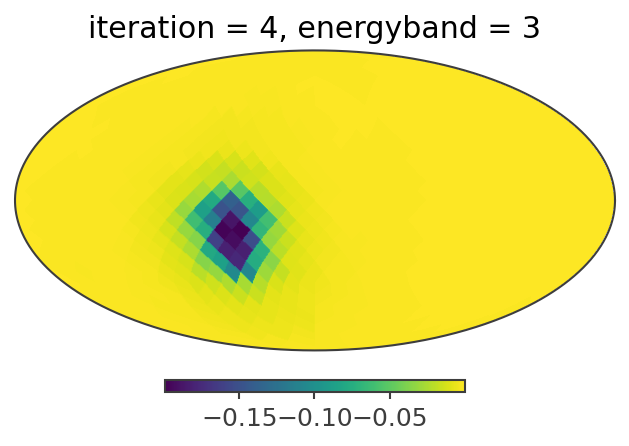

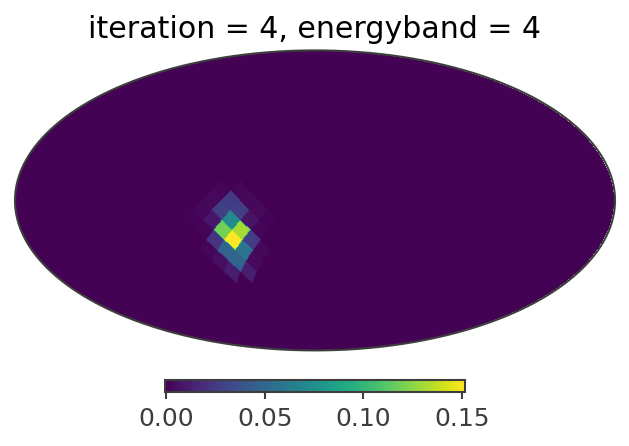

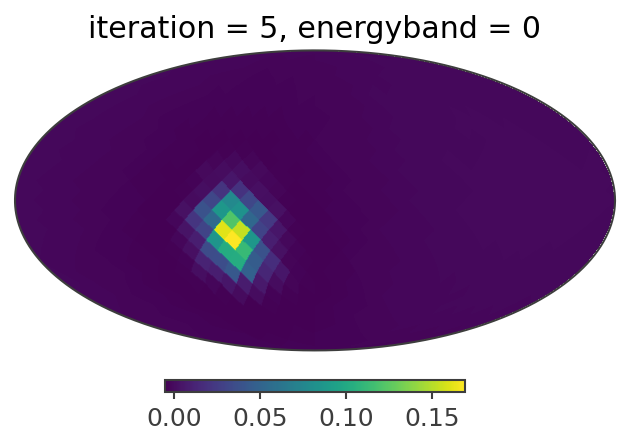

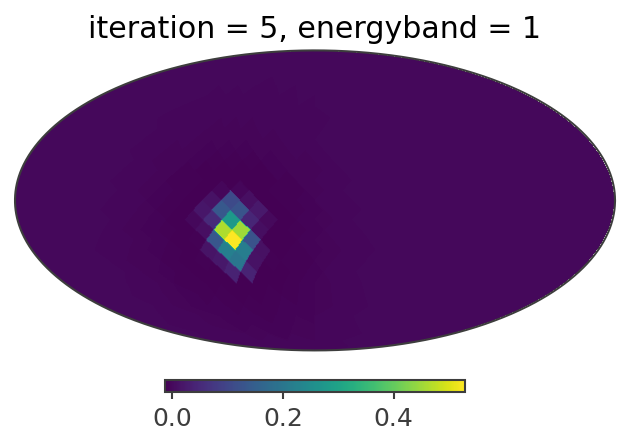

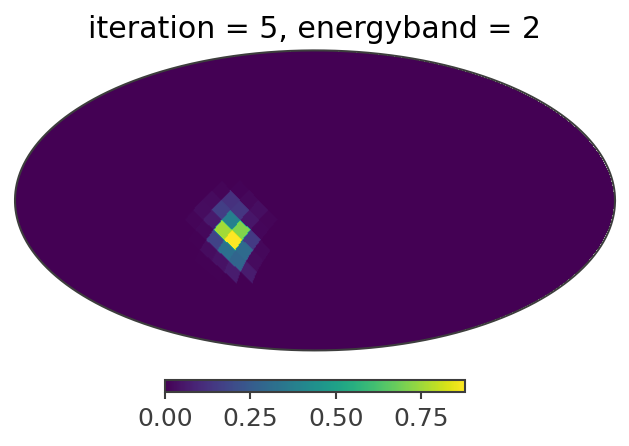

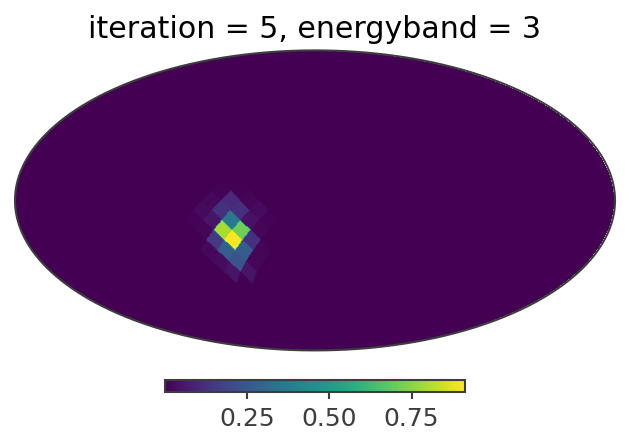

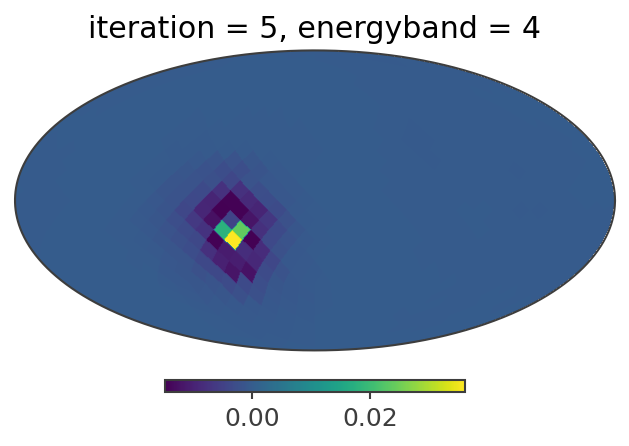

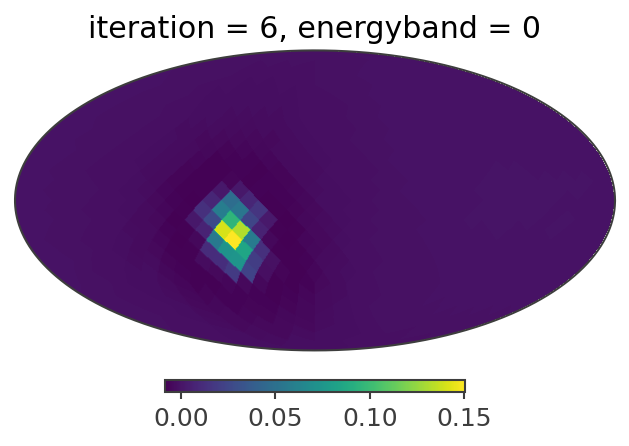

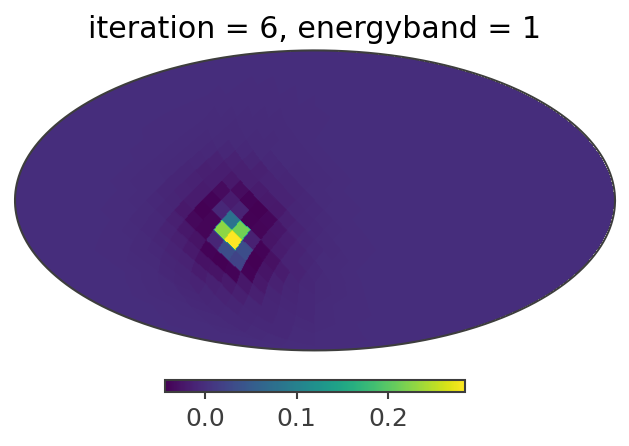

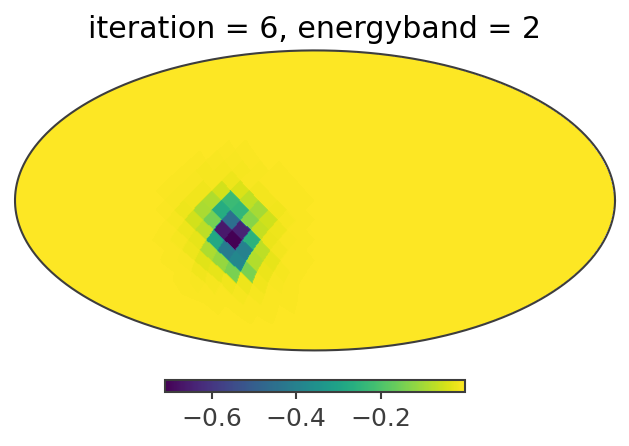

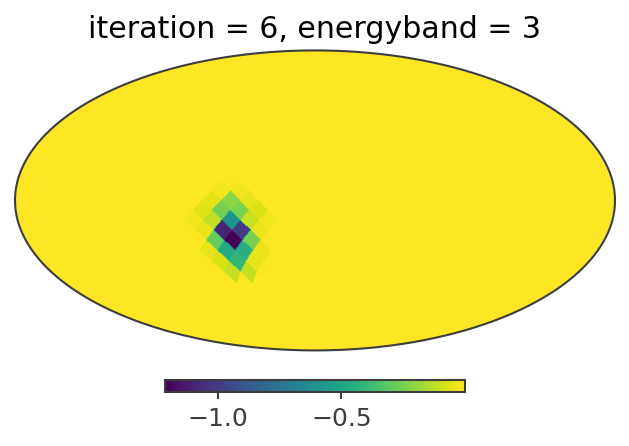

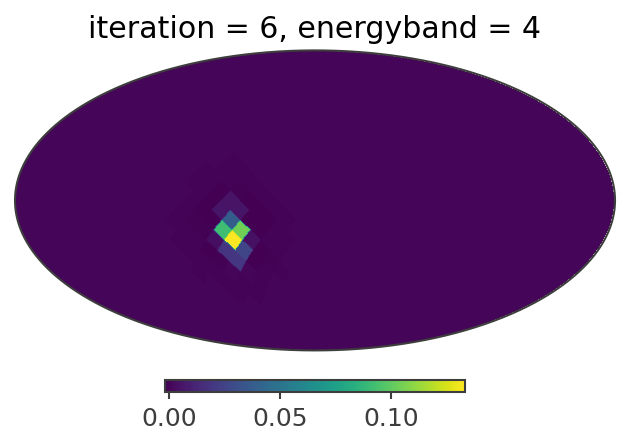

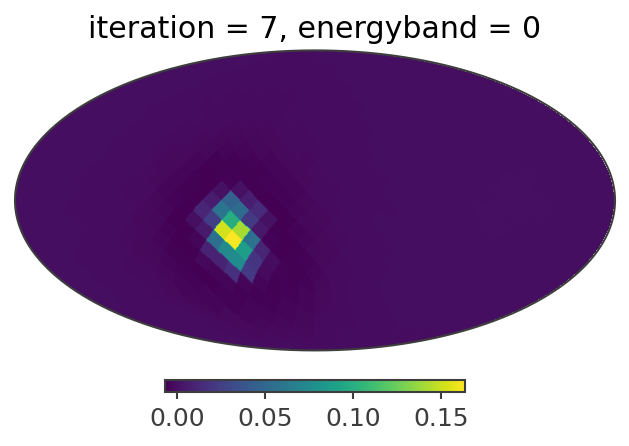

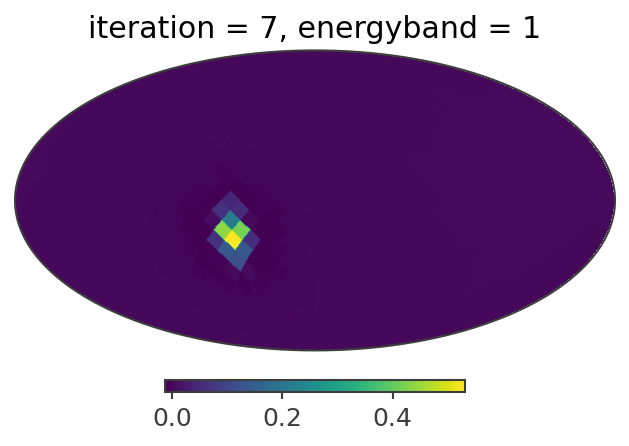

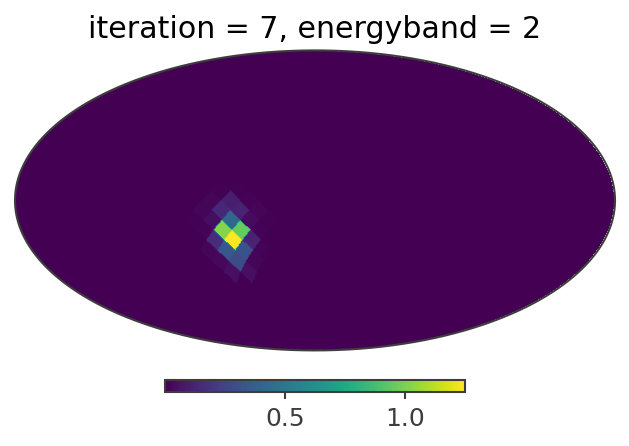

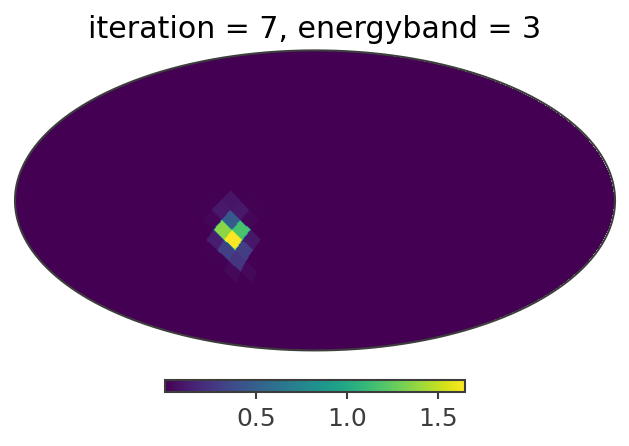

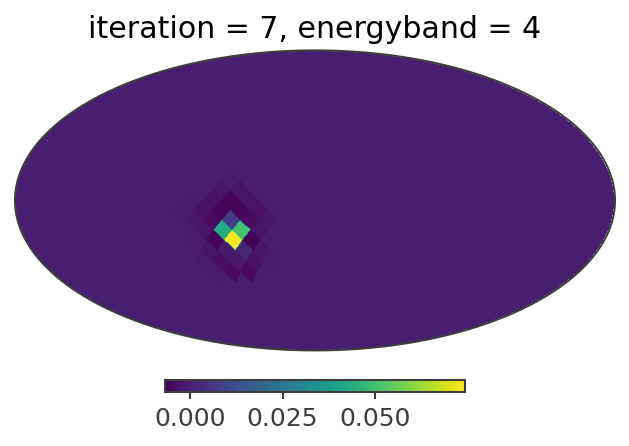

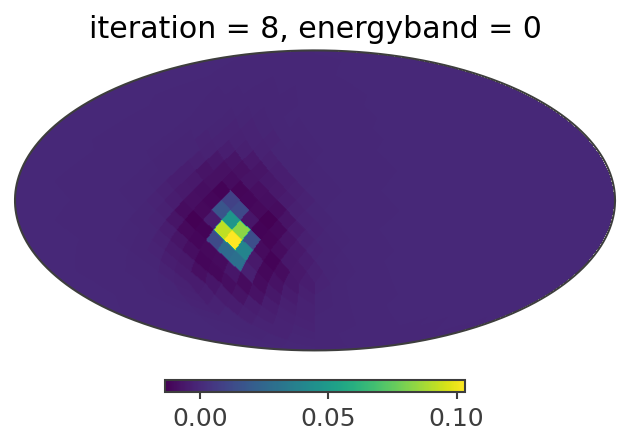

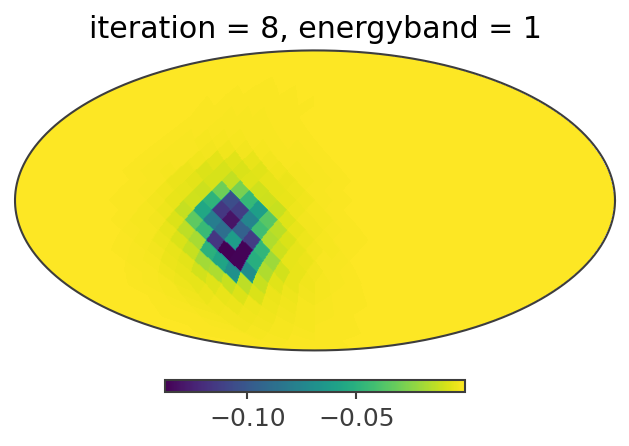

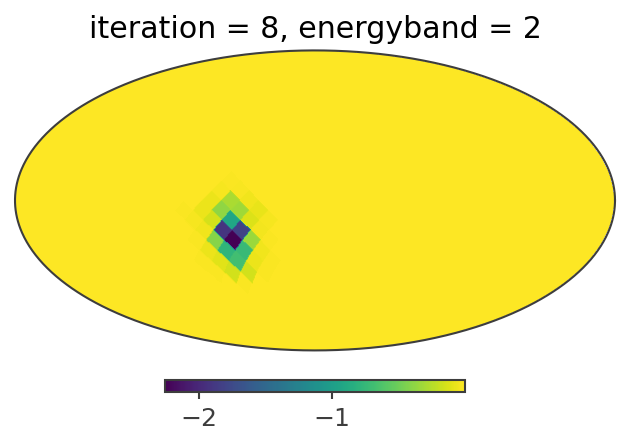

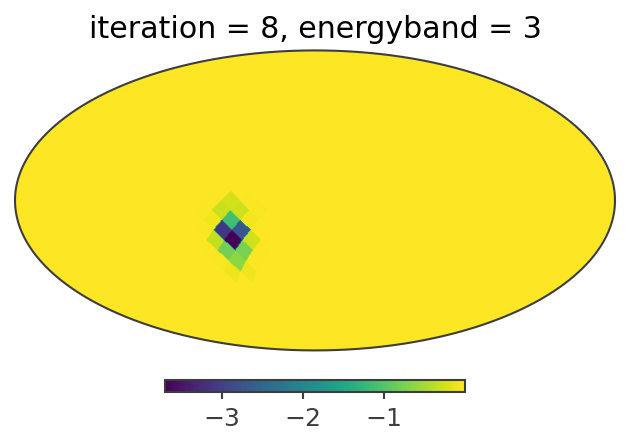

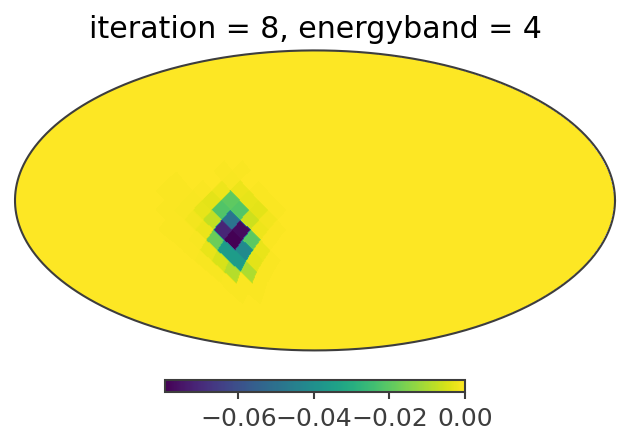

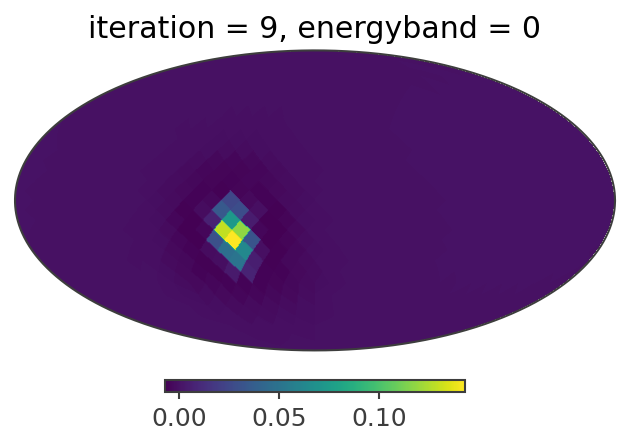

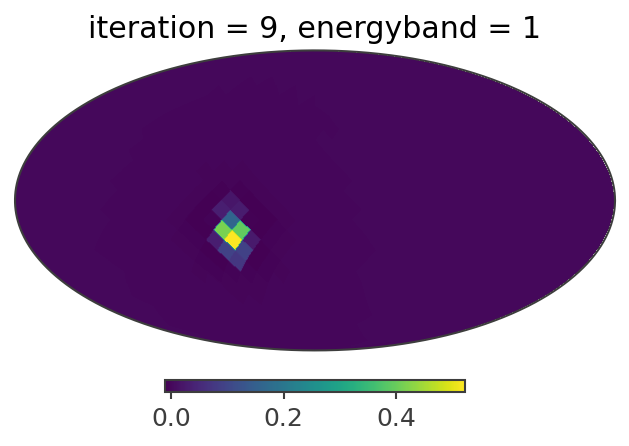

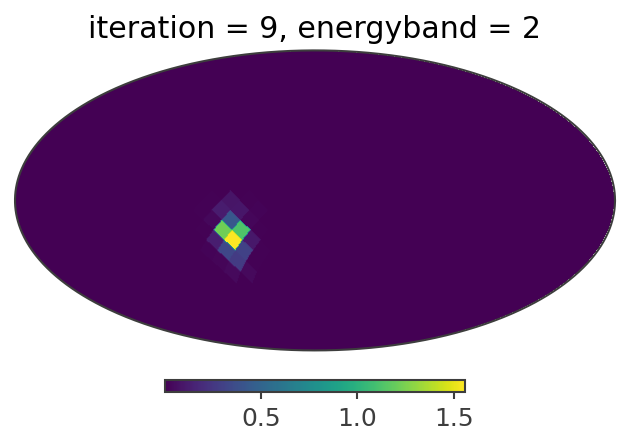

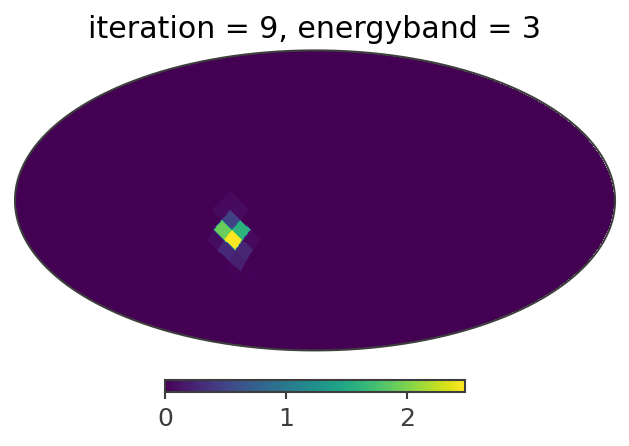

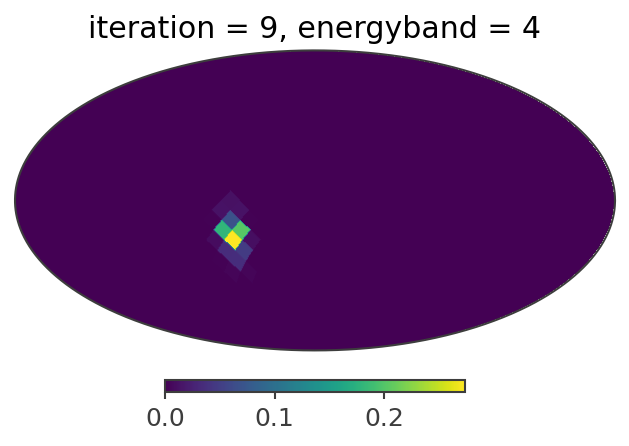

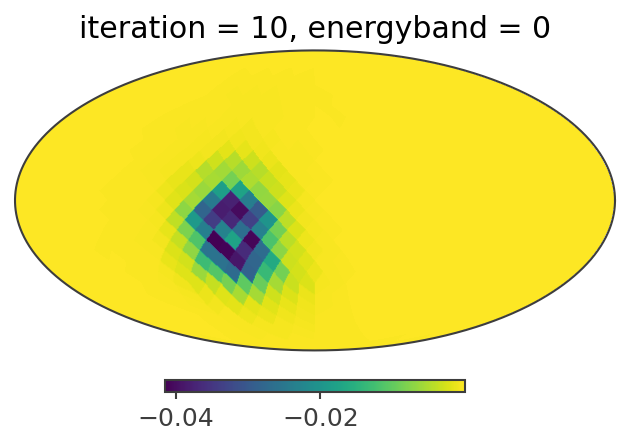

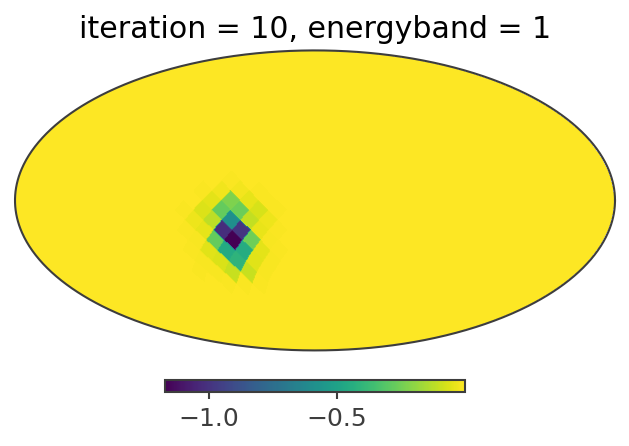

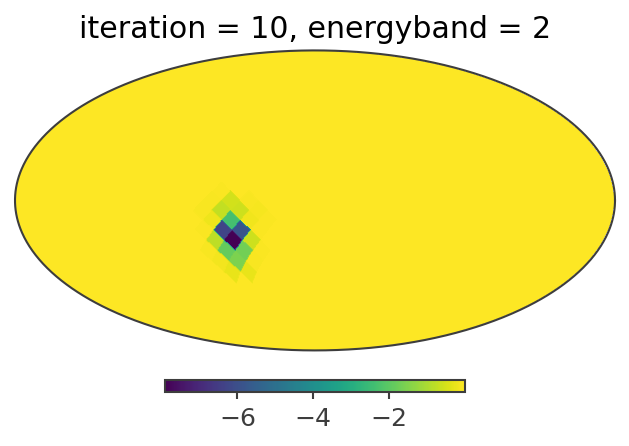

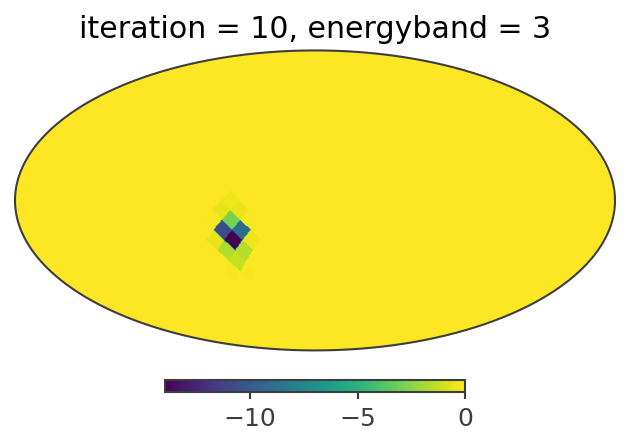

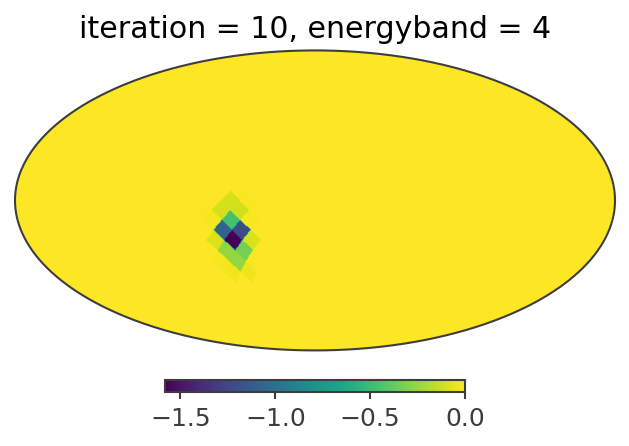

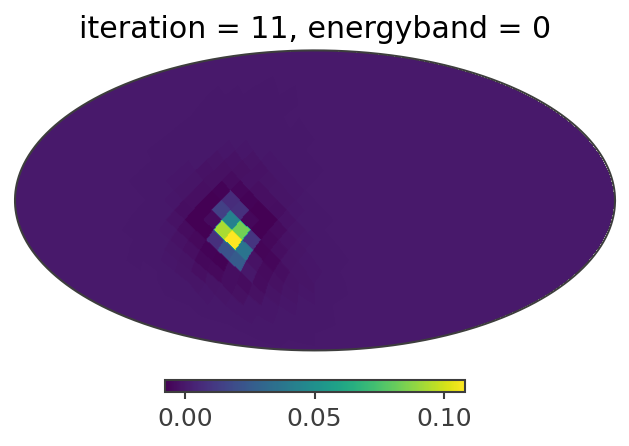

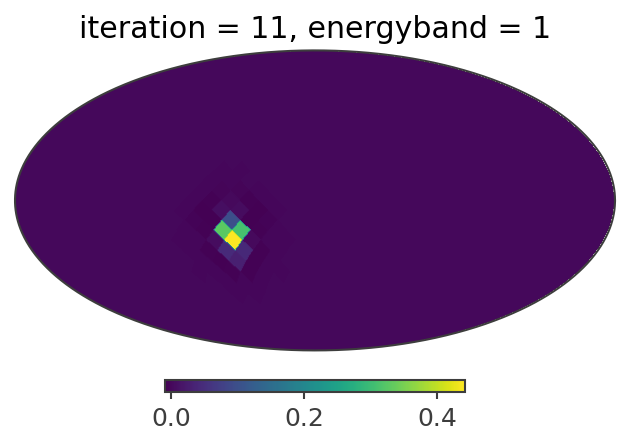

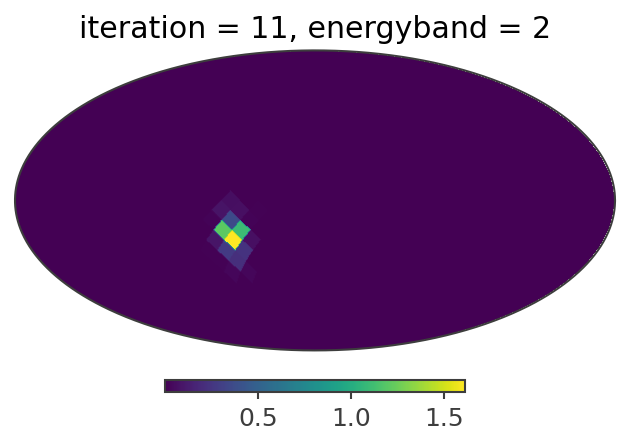

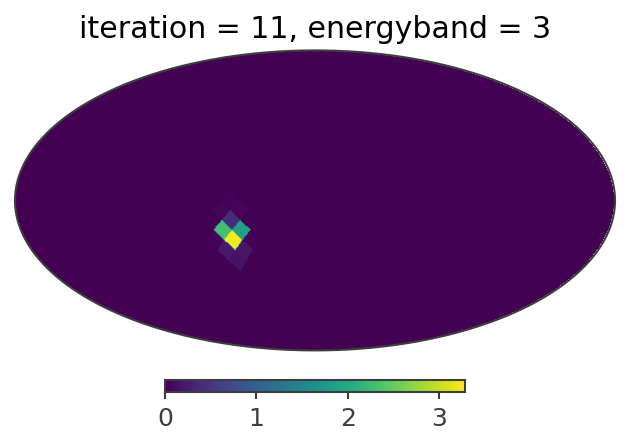

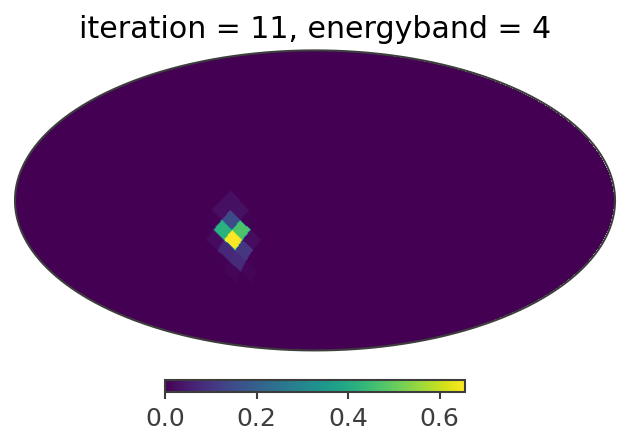

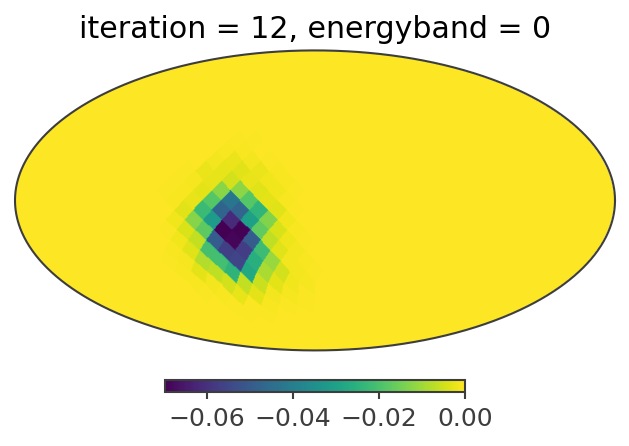

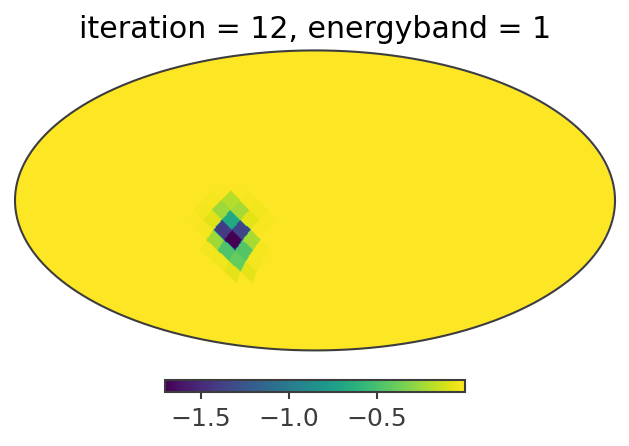

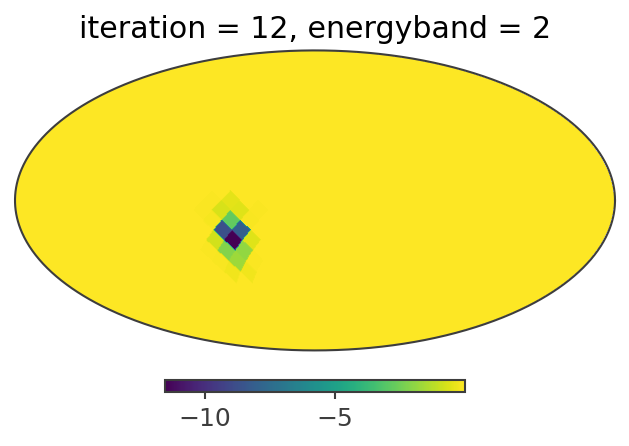

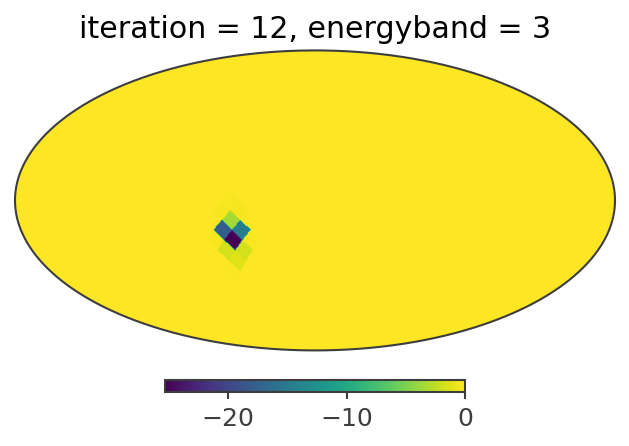

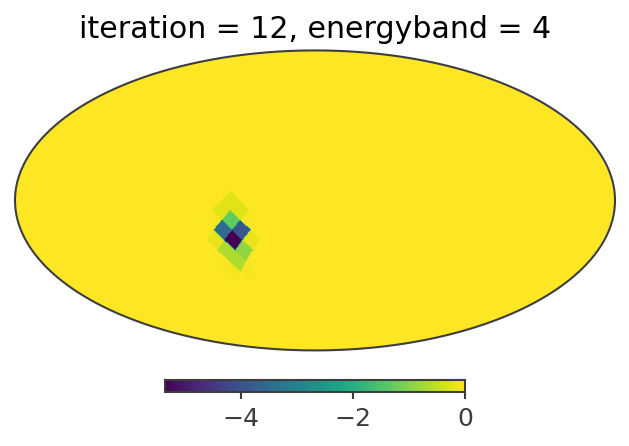

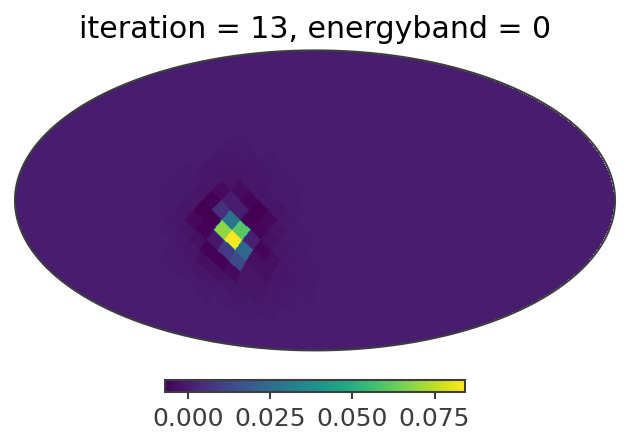

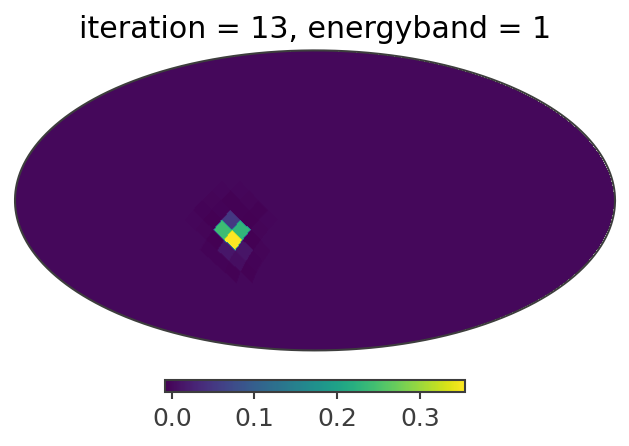

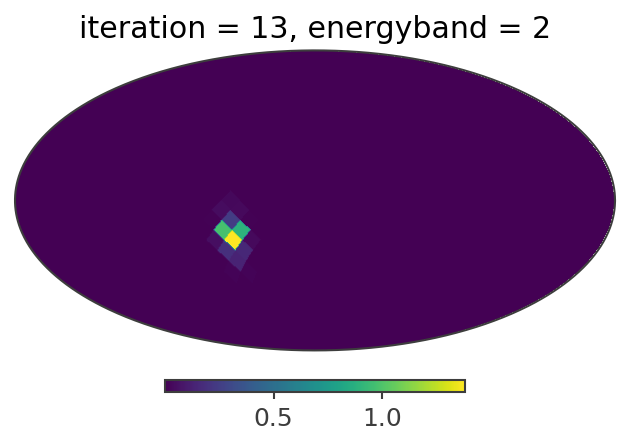

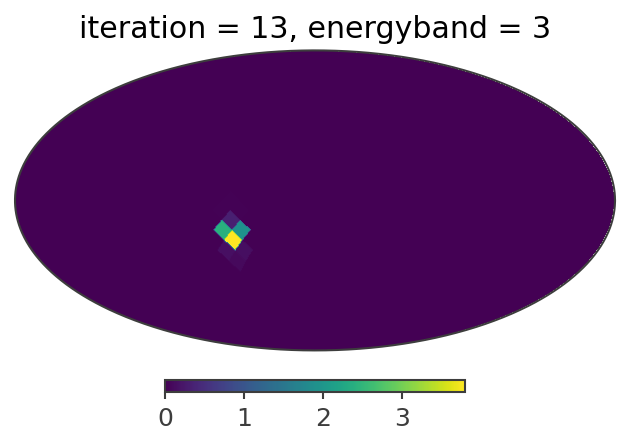

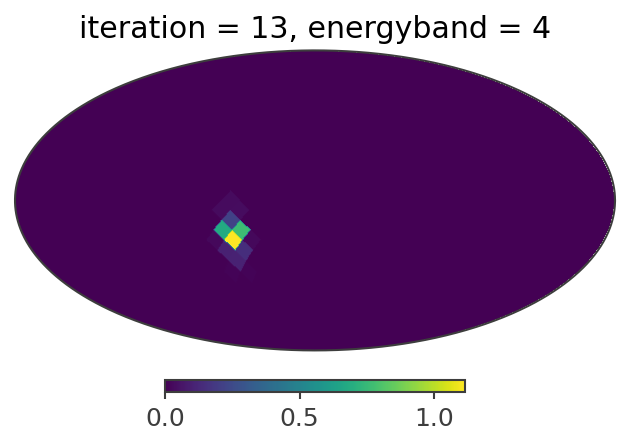

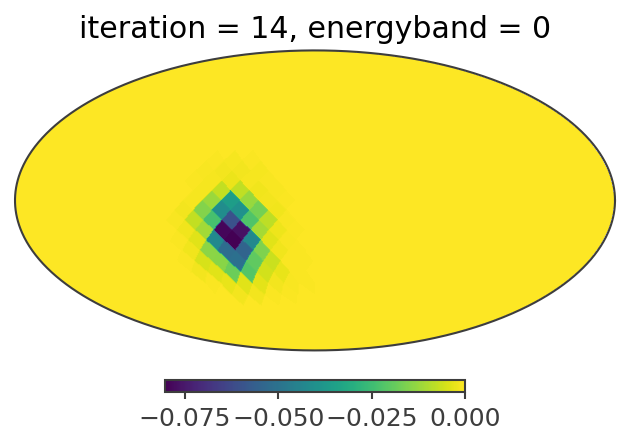

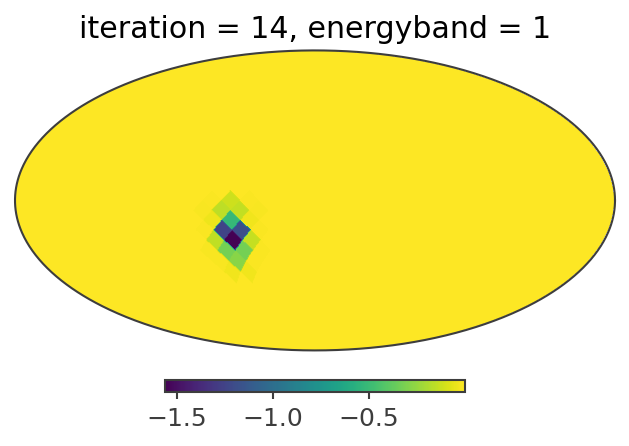

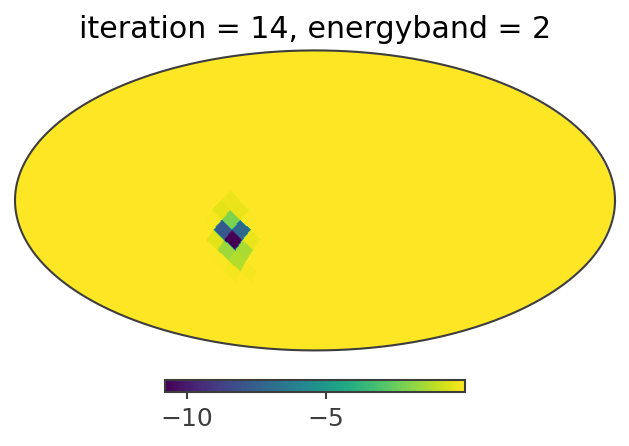

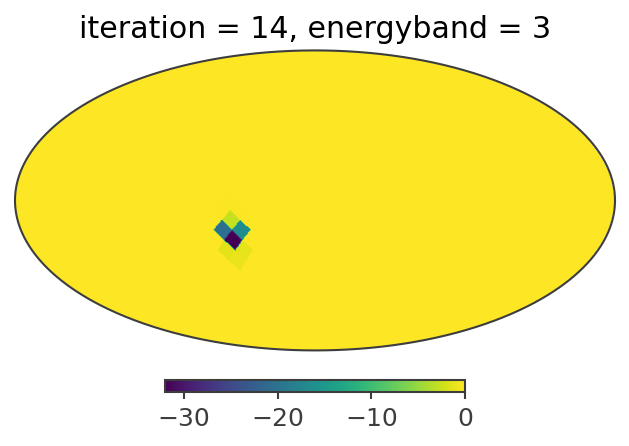

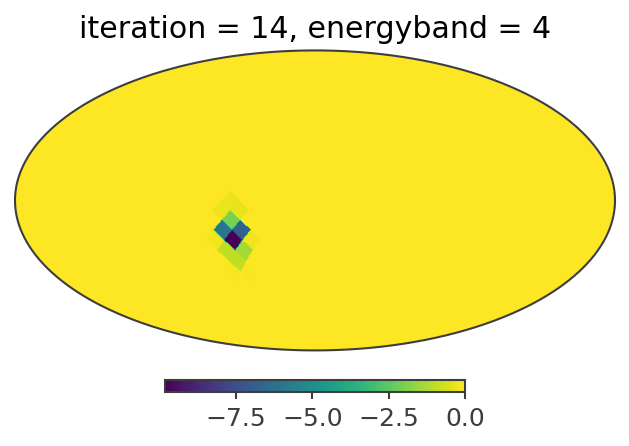

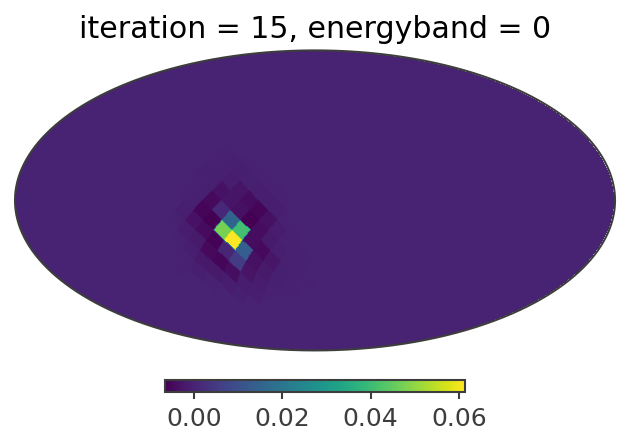

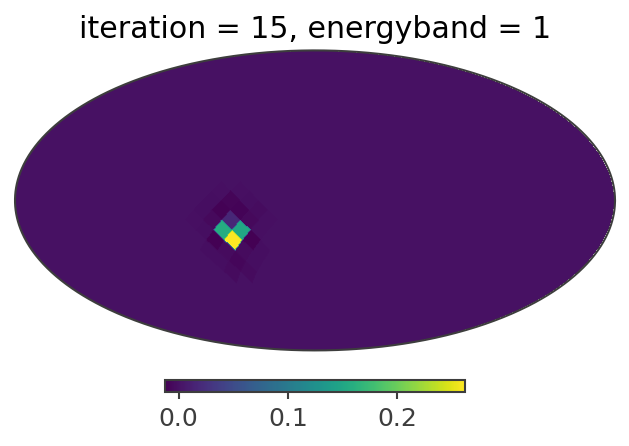

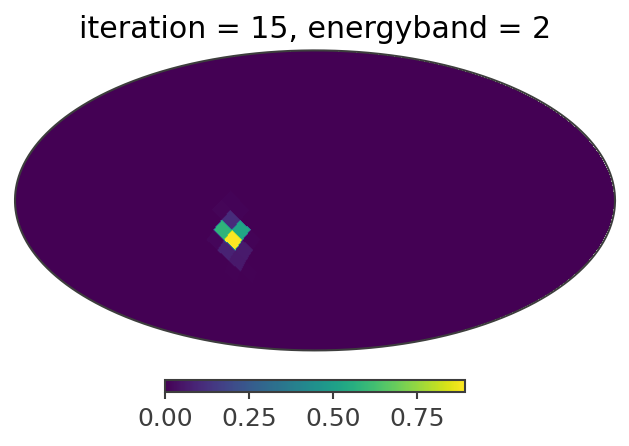

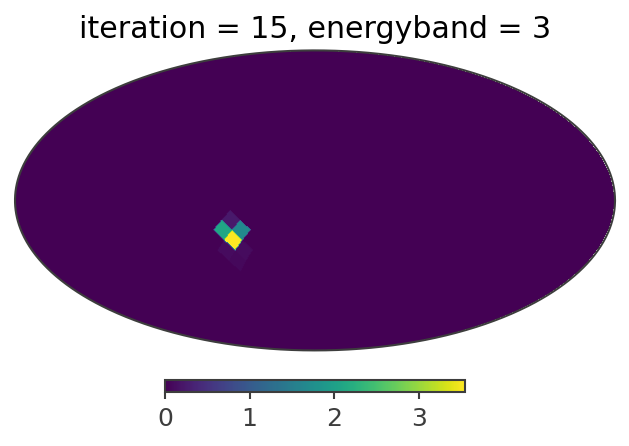

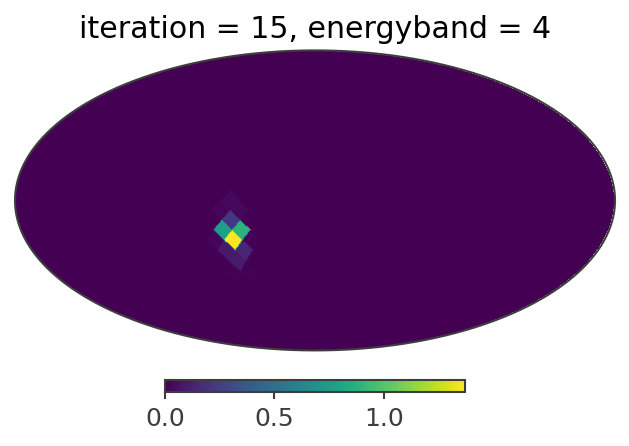

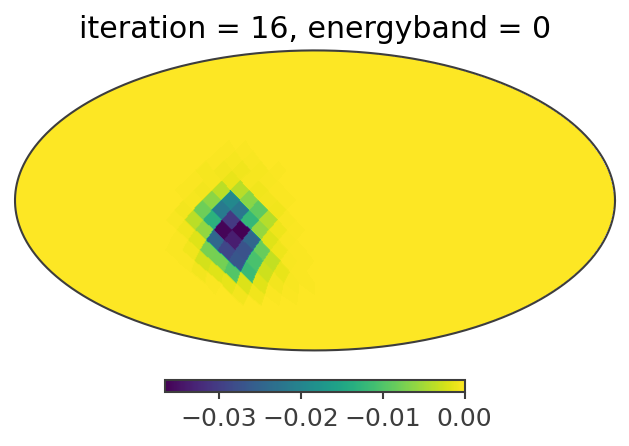

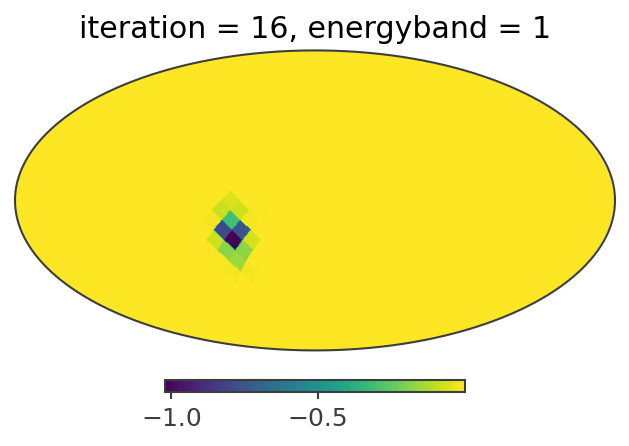

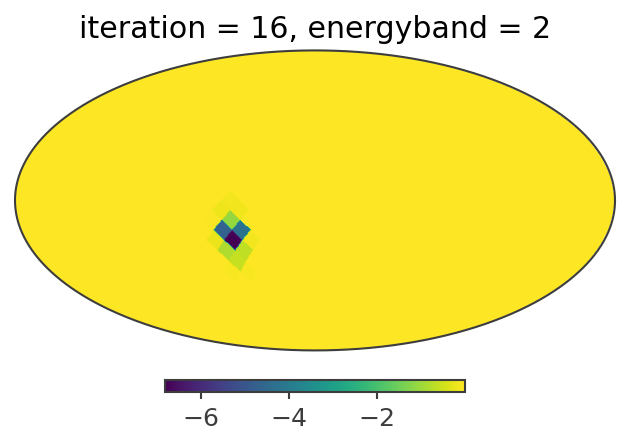

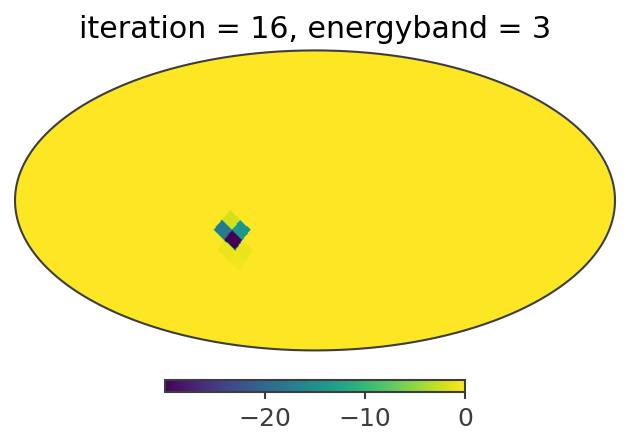

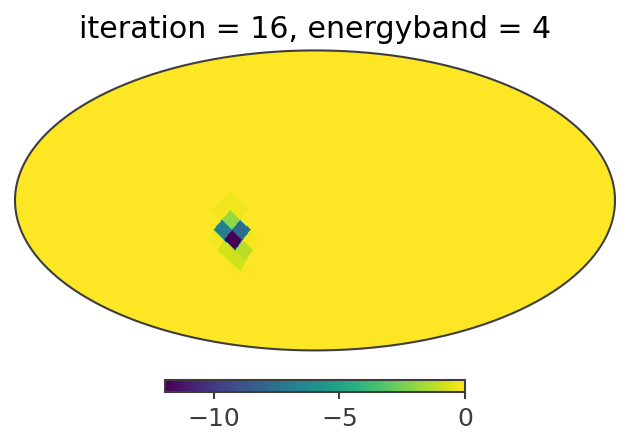

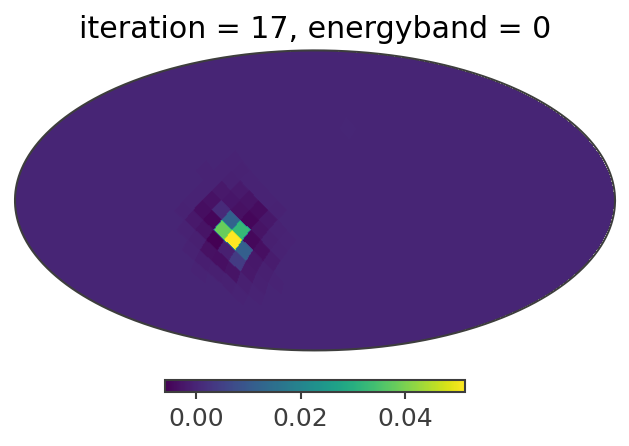

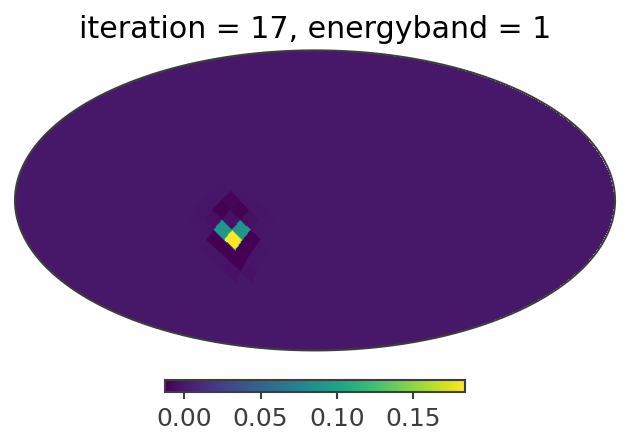

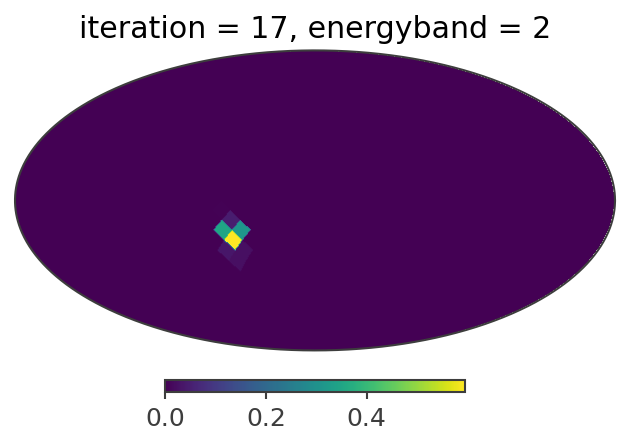

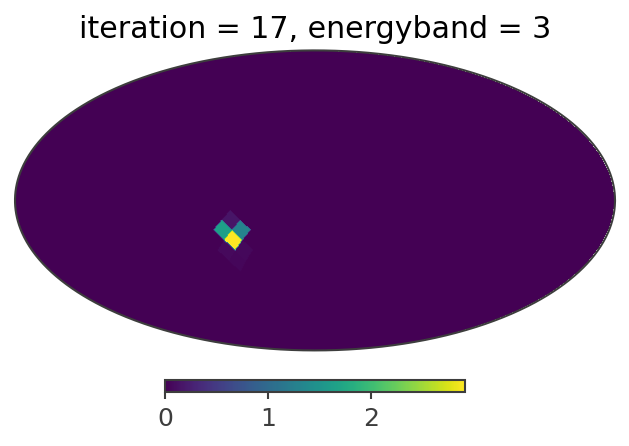

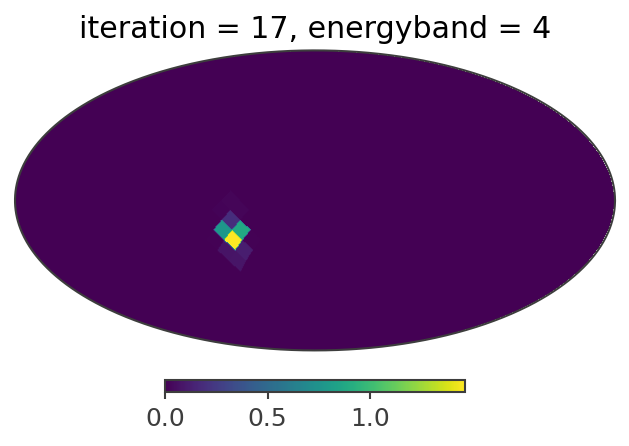

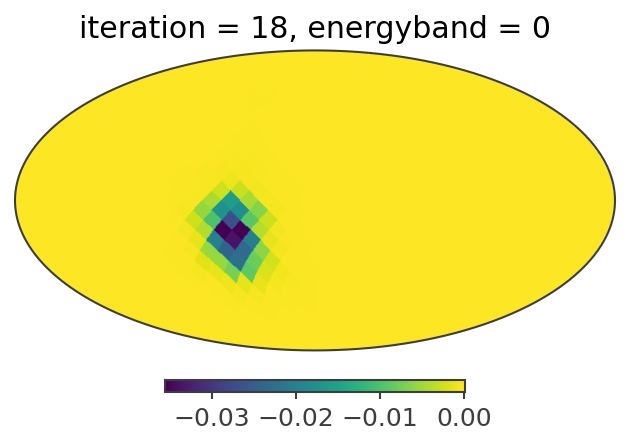

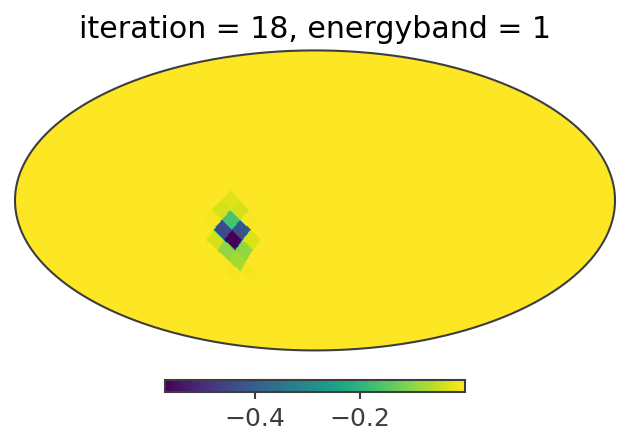

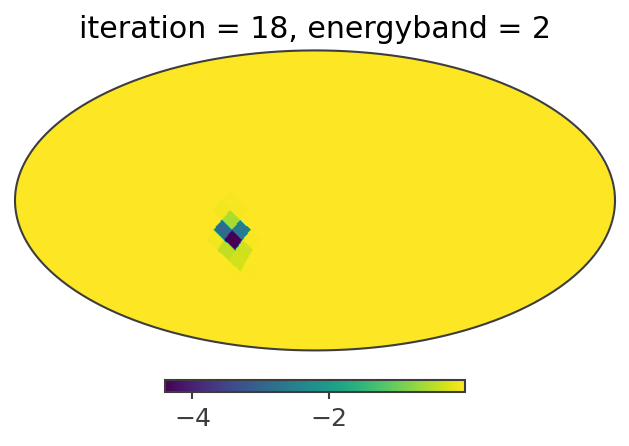

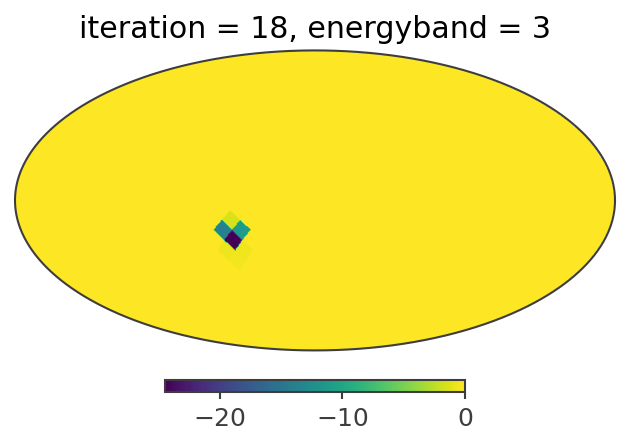

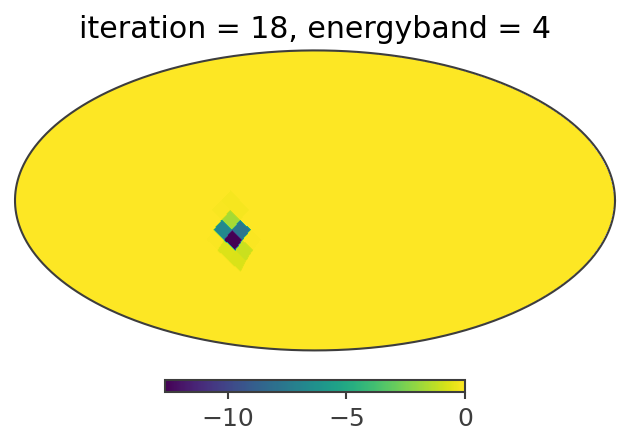

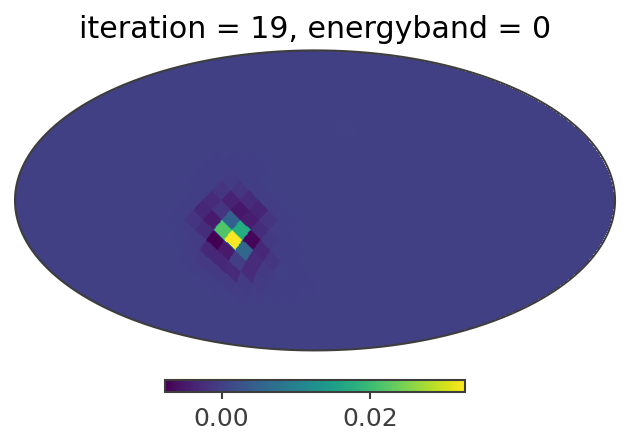

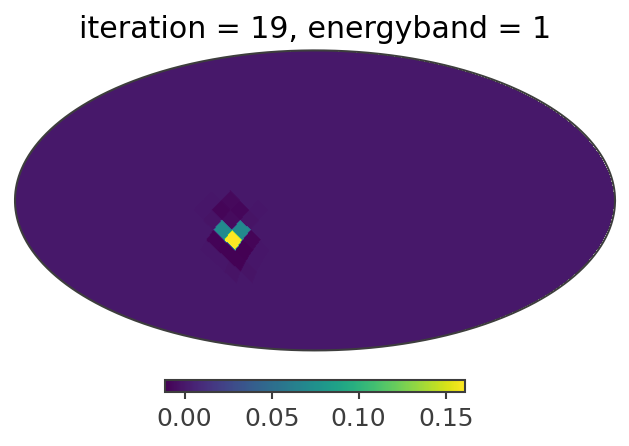

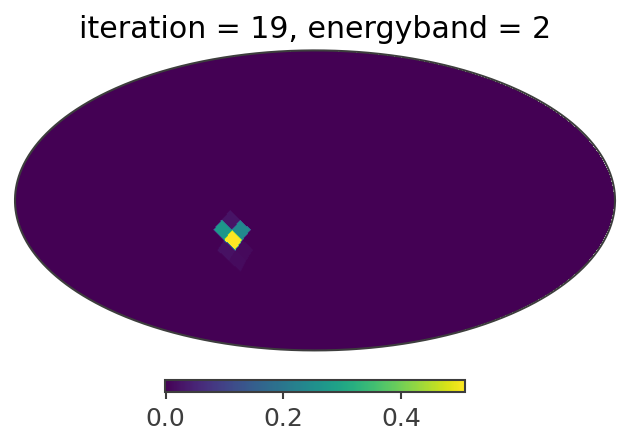

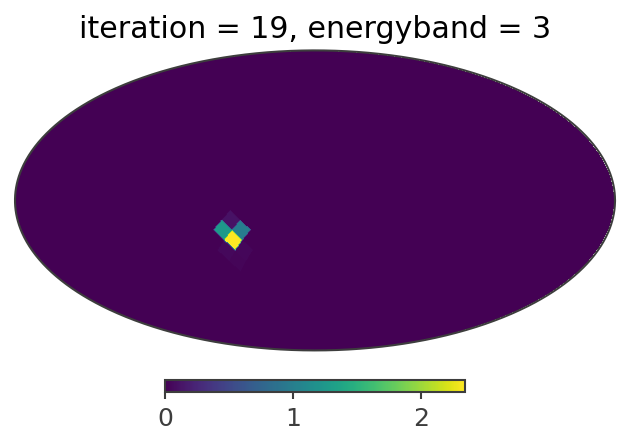

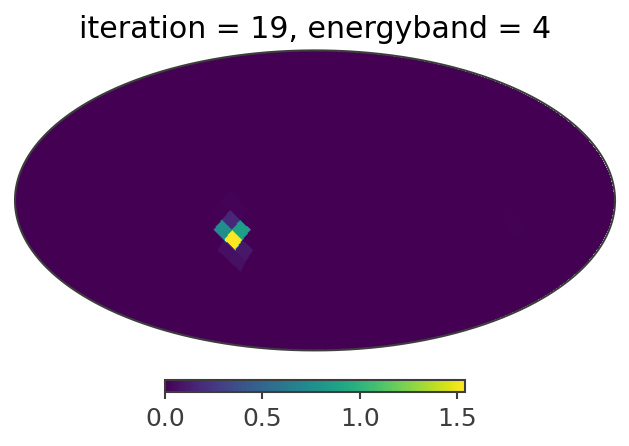

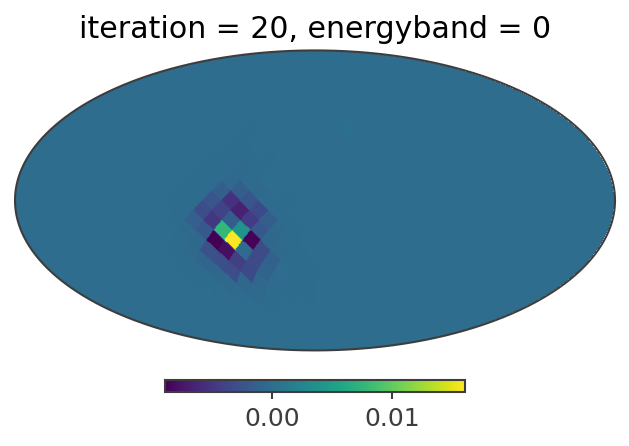

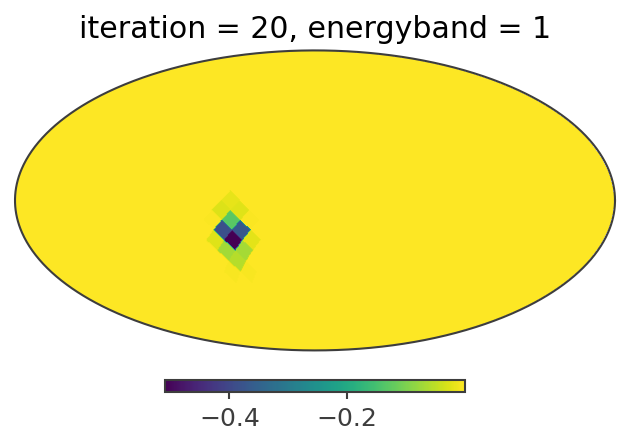

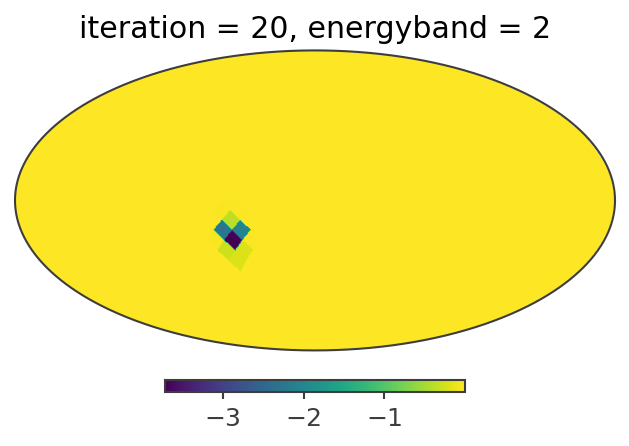

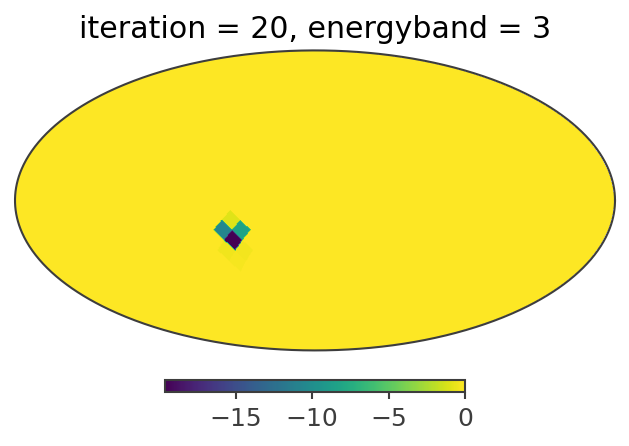

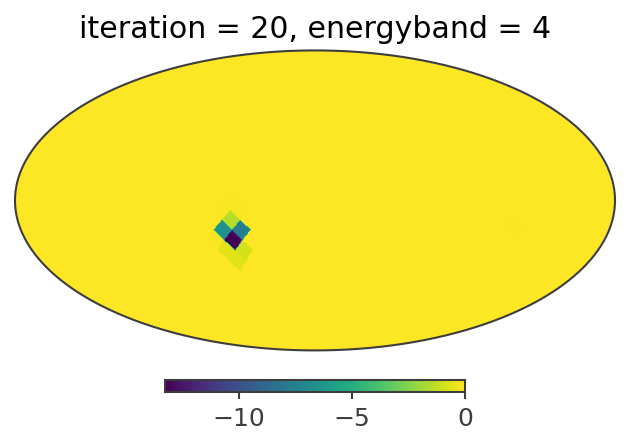

In [21]:
for _ in all_result:
    iteration = _['iteration']
    image = _['delta_map']
        
    for energy_band in range(5):
        map_healpxmap = HealpixMap(data = image[:,energy_band], unit = image.unit)

        map_healpxmap.plot()
        plt.title(label = "iteration = {}, energyband = {}".format(iteration, energy_band))
        plt.show()

### flux

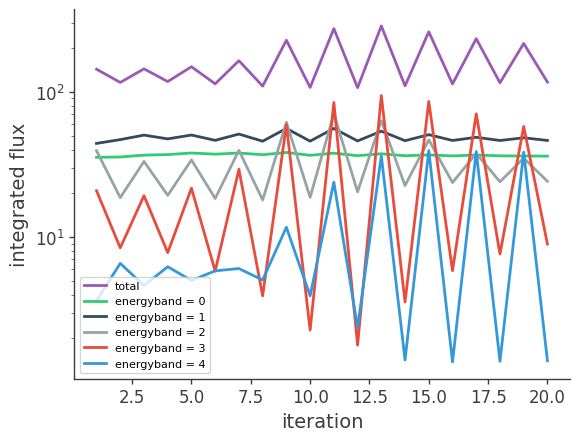

In [22]:
iteration = []
integrated_flux = []
integrated_flux_each_band = [[],[],[],[],[]]

for _ in all_result:
    iteration.append(_['iteration'])
    image = _['model_map']

    integrated_flux.append( np.sum(image) / image.unit)

    for energy_band in range(5):
        integrated_flux_each_band[energy_band].append( np.sum(image[:,energy_band]) / image.unit)
        
plt.plot(iteration, integrated_flux, label = 'total')
plt.xlabel("iteration")
plt.ylabel("integrated flux")
plt.yscale("log")

for energy_band in range(5):
    plt.plot(iteration, integrated_flux_each_band[energy_band], label = "energyband = {}".format(energy_band))
    
plt.legend()

## find the location with the maximum flux
- as an example, here it calculate the location of the maximum flux at the 5th iteration's map at the highest energy bin 

In [23]:
import healpy as hp
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import ICRS, Galactic, FK4, FK5

idx_iteration = 19
idx_energy = 4

argmax = np.argmax(all_result[idx_iteration]["model_map"].contents[:,idx_energy:idx_energy+1])
nside = all_result[idx_iteration]["model_map"].axes["lb"].nside
coordsys = all_result[idx_iteration]["model_map"].axes["lb"].coordsys

theta, phi = hp.pix2ang(nside, argmax)

l, b = phi * 180 / np.pi, 90 - theta * 180 / np.pi

c = SkyCoord(l, b, unit="deg", frame = coordsys)

print(f"The source position is around (l ,b) = ({c.galactic.l.deg} deg., {c.galactic.b.deg} deg.) in galactic")
print(f"The source position is around (ra, dec) = ({c.icrs.ra.deg} deg., {c.icrs.dec.deg} deg.) in icrs")

The source position is around (l ,b) = (50.62499999999999 deg., -19.47122063449069 deg.) in galactic
The source position is around (ra, dec) = (308.30194136772735 deg., 5.913074059175163 deg.) in icrs


## load the results from the save files

In [24]:
from histpy import Histogram
from mhealpy import HealpixMap

In [25]:
iteration = 5

model_map = Histogram.open(f"model_map_itr{iteration}.hdf5")

(<matplotlib.image.AxesImage at 0x2b3aa3100>, <Mollview: >)

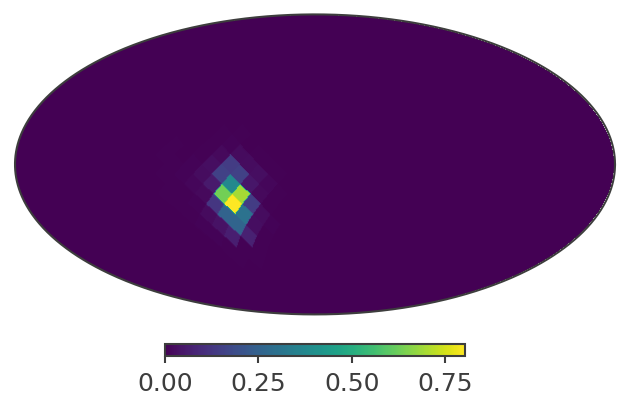

In [26]:
idx_energy = 4

map_energy_sliced = HealpixMap(data = model_map.slice[{"Ei": idx_energy}].contents.reshape([-1]))

map_energy_sliced.plot()